## Project Overview

- **This notebook focuses on building a machine learning model to predict customer churn, using a dataset containing demographic, account, and engagement details for each customer.**
- **By identifying high-risk customers, businesses can improve customer retention and reduce churn rates.**
- **To build an accurate and robust model for predicting customer churn, enabling targeted retention strategies.**

## SetUp

In [123]:
# Customer Analysis and EDA
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ptitprince

# Machine Learning

## Feature Scaling
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler

## ML Models - Different Algorithms
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from xgboost import XGBClassifier

## Metrics
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import roc_auc_score, roc_curve

## Comparison of Performance of All Algorithms
from sklearn.model_selection import cross_validate, learning_curve


In [124]:
df = pd.read_csv('/Users/afnanalamri/Desktop/MyProject/CustomerChurn/telecom_churn.csv')

In [125]:
import warnings
warnings.filterwarnings('ignore')

In [126]:
df

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
0,0,128,1,1,2.70,1,265.1,110,89.0,9.87,10.0
1,0,107,1,1,3.70,1,161.6,123,82.0,9.78,13.7
2,0,137,1,0,0.00,0,243.4,114,52.0,6.06,12.2
3,0,84,0,0,0.00,2,299.4,71,57.0,3.10,6.6
4,0,75,0,0,0.00,3,166.7,113,41.0,7.42,10.1
...,...,...,...,...,...,...,...,...,...,...,...
3328,0,192,1,1,2.67,2,156.2,77,71.7,10.78,9.9
3329,0,68,1,0,0.34,3,231.1,57,56.4,7.67,9.6
3330,0,28,1,0,0.00,2,180.8,109,56.0,14.44,14.1
3331,0,184,0,0,0.00,2,213.8,105,50.0,7.98,5.0


In [127]:
df.RoamMins.value_counts()

10.0    62
11.3    59
9.8     56
10.9    56
10.1    53
        ..
2.7      1
18.9     1
17.2     1
1.3      1
2.5      1
Name: RoamMins, Length: 162, dtype: int64

In [128]:
# !pip install ptitprince

In [129]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Churn            3333 non-null   int64  
 1   AccountWeeks     3333 non-null   int64  
 2   ContractRenewal  3333 non-null   int64  
 3   DataPlan         3333 non-null   int64  
 4   DataUsage        3333 non-null   float64
 5   CustServCalls    3333 non-null   int64  
 6   DayMins          3333 non-null   float64
 7   DayCalls         3333 non-null   int64  
 8   MonthlyCharge    3333 non-null   float64
 9   OverageFee       3333 non-null   float64
 10  RoamMins         3333 non-null   float64
dtypes: float64(5), int64(6)
memory usage: 286.6 KB


In [130]:
df.isnull().sum()

Churn              0
AccountWeeks       0
ContractRenewal    0
DataPlan           0
DataUsage          0
CustServCalls      0
DayMins            0
DayCalls           0
MonthlyCharge      0
OverageFee         0
RoamMins           0
dtype: int64

In [131]:
df.describe()

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,0.144914,101.064806,0.903090,0.276628,0.816475,1.562856,179.775098,100.435644,56.305161,10.051488,10.237294
std,0.352067,39.822106,0.295879,0.447398,1.272668,1.315491,54.467389,20.069084,16.426032,2.535712,2.791840
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,0.000000,0.000000
25%,0.000000,74.000000,1.000000,0.000000,0.000000,1.000000,143.700000,87.000000,45.000000,8.330000,8.500000
50%,0.000000,101.000000,1.000000,0.000000,0.000000,1.000000,179.400000,101.000000,53.500000,10.070000,10.300000
75%,0.000000,127.000000,1.000000,1.000000,1.780000,2.000000,216.400000,114.000000,66.200000,11.770000,12.100000
max,1.000000,243.000000,1.000000,1.000000,5.400000,9.000000,350.800000,165.000000,111.300000,18.190000,20.000000


In [132]:
df.value_counts()

Churn  AccountWeeks  ContractRenewal  DataPlan  DataUsage  CustServCalls  DayMins  DayCalls  MonthlyCharge  OverageFee  RoamMins
0      1             1                0         0.00       0              123.8    113       42.0           11.81       3.7         1
       125           1                0         0.00       2              126.7    113       35.0           7.78        14.4        1
       131           1                0         0.00       2              187.9    110       49.0           10.03       10.2        1
                                                                          196.1    89        50.0           9.28        5.2         1
                                                                          263.4    123       58.0           7.60        10.7        1
                                                                                                                                   ..
       89            1                1         2.35       1       

## Customer Analysis

Generates a histogram for each numeric column

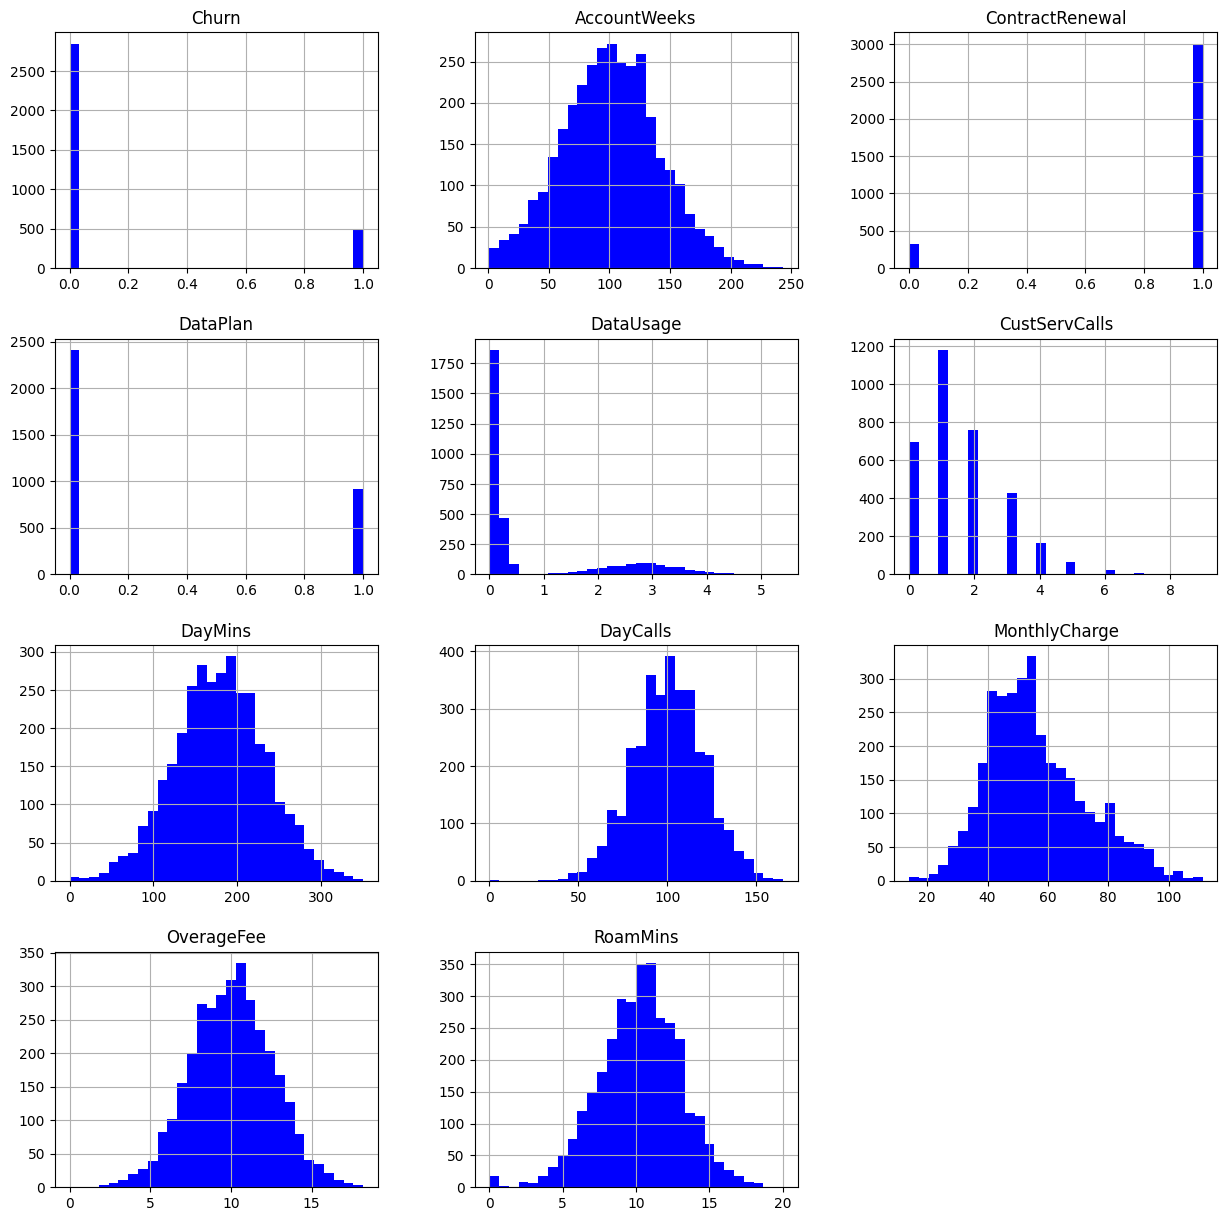

In [133]:
df.hist(figsize=(15,15), bins=30, color='b');


Feature interactions by churn status, revealing patterns and correlations.

In [134]:
df

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
0,0,128,1,1,2.70,1,265.1,110,89.0,9.87,10.0
1,0,107,1,1,3.70,1,161.6,123,82.0,9.78,13.7
2,0,137,1,0,0.00,0,243.4,114,52.0,6.06,12.2
3,0,84,0,0,0.00,2,299.4,71,57.0,3.10,6.6
4,0,75,0,0,0.00,3,166.7,113,41.0,7.42,10.1
...,...,...,...,...,...,...,...,...,...,...,...
3328,0,192,1,1,2.67,2,156.2,77,71.7,10.78,9.9
3329,0,68,1,0,0.34,3,231.1,57,56.4,7.67,9.6
3330,0,28,1,0,0.00,2,180.8,109,56.0,14.44,14.1
3331,0,184,0,0,0.00,2,213.8,105,50.0,7.98,5.0


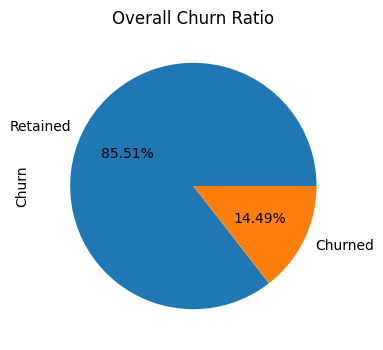

In [135]:
df["Churn"].value_counts().plot(
    kind="pie",
    autopct="%.2f%%",
    labels=["Retained", "Churned"],
    title="Overall Churn Ratio",
    figsize=(4, 4)
);


In [136]:
df.head()

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
0,0,128,1,1,2.7,1,265.1,110,89.0,9.87,10.0
1,0,107,1,1,3.7,1,161.6,123,82.0,9.78,13.7
2,0,137,1,0,0.0,0,243.4,114,52.0,6.06,12.2
3,0,84,0,0,0.0,2,299.4,71,57.0,3.10,6.6
4,0,75,0,0,0.0,3,166.7,113,41.0,7.42,10.1


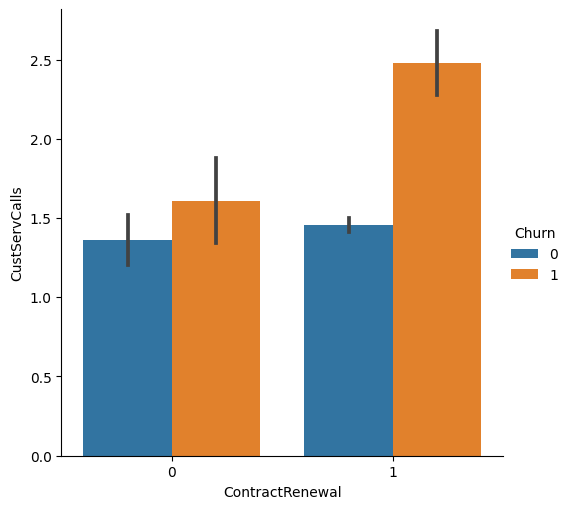

In [137]:
sns.catplot(x="ContractRenewal", y="CustServCalls", hue="Churn", kind="bar", data=df);


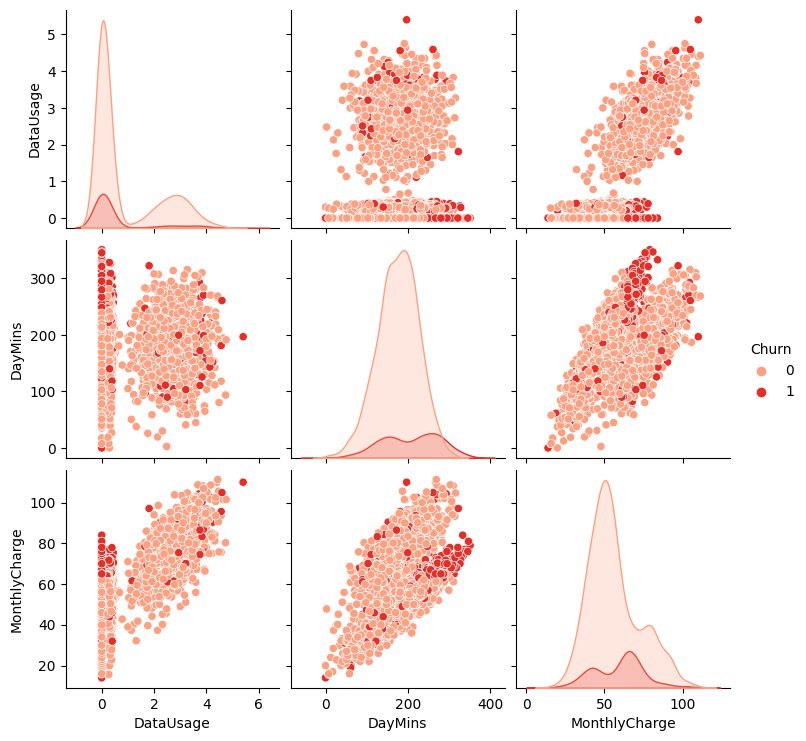

In [140]:
sns.pairplot(data = df[["DataUsage","DayMins","MonthlyCharge","Churn"]],
            hue="Churn", palette='Reds')
plt.show()

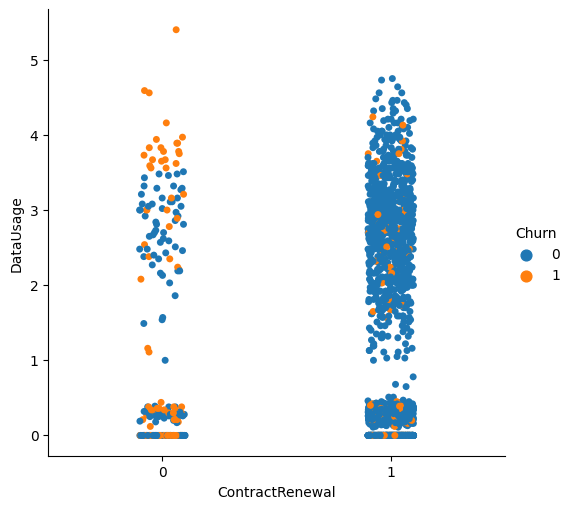

In [138]:
sns.catplot(x="ContractRenewal", y="DataUsage", hue="Churn", data=df);


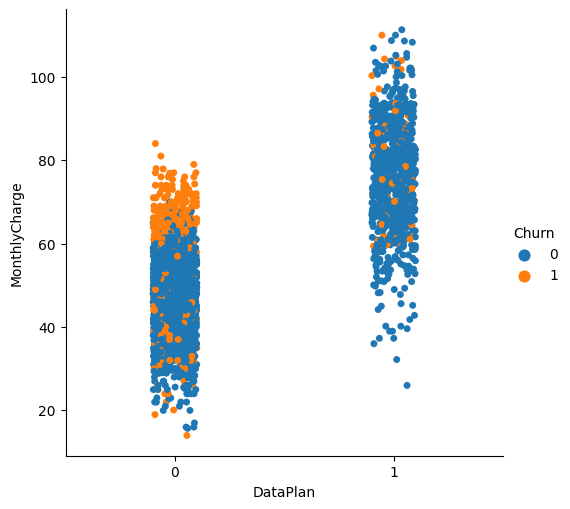

In [139]:
sns.catplot(x="DataPlan", y="MonthlyCharge", hue="Churn", data=df);

In [19]:
df1 = df.loc[df["Churn"]==1] # Churned Customers
df0 = df.loc[df["Churn"]==0] # Existing Customers

### 1. Daily Min vs Monthly Charge

Text(0.5, 1.0, 'Churn=0&1')

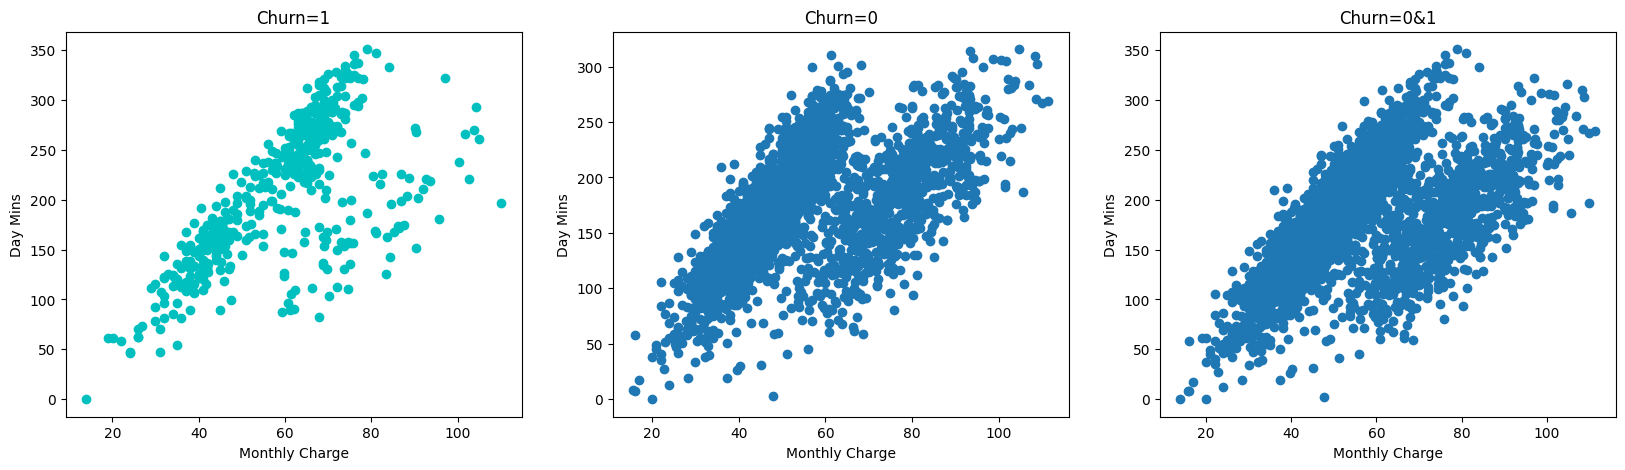

In [20]:
plt.figure(figsize=(20,5))

plt.subplot(131)
plt.plot(df1["MonthlyCharge"], df1["DayMins"], "co")
plt.xlabel("Monthly Charge")
plt.ylabel("Day Mins")
plt.title("Churn=1")

plt.subplot(132)
plt.plot(df0["MonthlyCharge"], df0["DayMins"], "o")
plt.xlabel("Monthly Charge")
plt.ylabel("Day Mins")
plt.title("Churn=0")

plt.subplot(133)
plt.plot(df["MonthlyCharge"], df["DayMins"], "o")
plt.xlabel("Monthly Charge")
plt.ylabel("Day Mins")
plt.title("Churn=0&1")

### 2. Data Usage vs Monthly Charge

Text(0.5, 1.0, 'Churn=0&1')

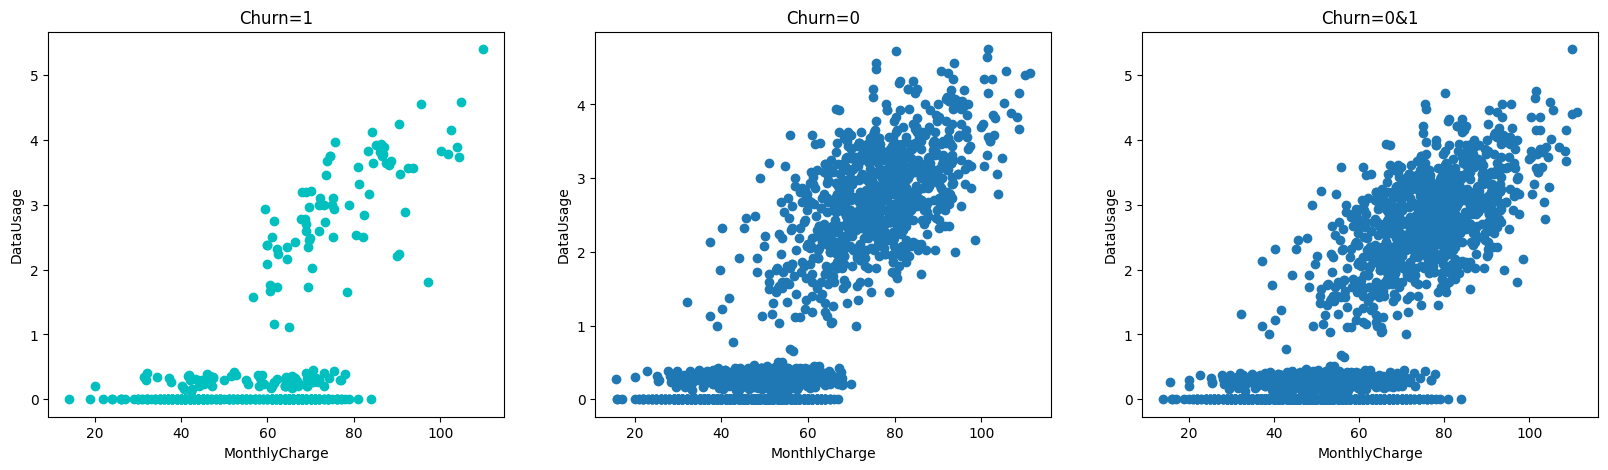

In [21]:
plt.figure(figsize=(20,5))

plt.subplot(131)
plt.plot(df1["MonthlyCharge"], df1["DataUsage"], "co")
plt.xlabel("MonthlyCharge")
plt.ylabel("DataUsage")
plt.title("Churn=1")

plt.subplot(132)
plt.plot(df0["MonthlyCharge"], df0["DataUsage"], "o")
plt.xlabel("MonthlyCharge")
plt.ylabel("DataUsage")
plt.title("Churn=0")

plt.subplot(133)
plt.plot(df["MonthlyCharge"], df["DataUsage"], "o")
plt.xlabel("MonthlyCharge")
plt.ylabel("DataUsage")
plt.title("Churn=0&1")

For data usage, we can categorize customers into two segments:

1. Customers with data usage between 0 and 1.
2. Customers with data usage greater than 1.

## Customer Segmentation

In [22]:
df["DataUsage"]

0       2.70
1       3.70
2       0.00
3       0.00
4       0.00
        ... 
3328    2.67
3329    0.34
3330    0.00
3331    0.00
3332    3.70
Name: DataUsage, Length: 3333, dtype: float64

In [23]:
df

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
0,0,128,1,1,2.70,1,265.1,110,89.0,9.87,10.0
1,0,107,1,1,3.70,1,161.6,123,82.0,9.78,13.7
2,0,137,1,0,0.00,0,243.4,114,52.0,6.06,12.2
3,0,84,0,0,0.00,2,299.4,71,57.0,3.10,6.6
4,0,75,0,0,0.00,3,166.7,113,41.0,7.42,10.1
...,...,...,...,...,...,...,...,...,...,...,...
3328,0,192,1,1,2.67,2,156.2,77,71.7,10.78,9.9
3329,0,68,1,0,0.34,3,231.1,57,56.4,7.67,9.6
3330,0,28,1,0,0.00,2,180.8,109,56.0,14.44,14.1
3331,0,184,0,0,0.00,2,213.8,105,50.0,7.98,5.0


In [24]:
# Manual Customer Segmentaion
seg1 = df.loc[df["DataUsage"]<=1] # Segment1
seg2 = df.loc[df["DataUsage"]>1] # Segment2

seg11 = seg1.loc[seg1["Churn"]==1] # Churn Customers from Segment1
seg10 = seg1.loc[seg1["Churn"]==0] # Existing Custoemrs from Segment1

seg21 = seg2.loc[seg2["Churn"]==1] # Churned Custoemrs in segment2.
seg20 = seg2.loc[seg2["Churn"]==0] # Existing Custoemrs in segment2.

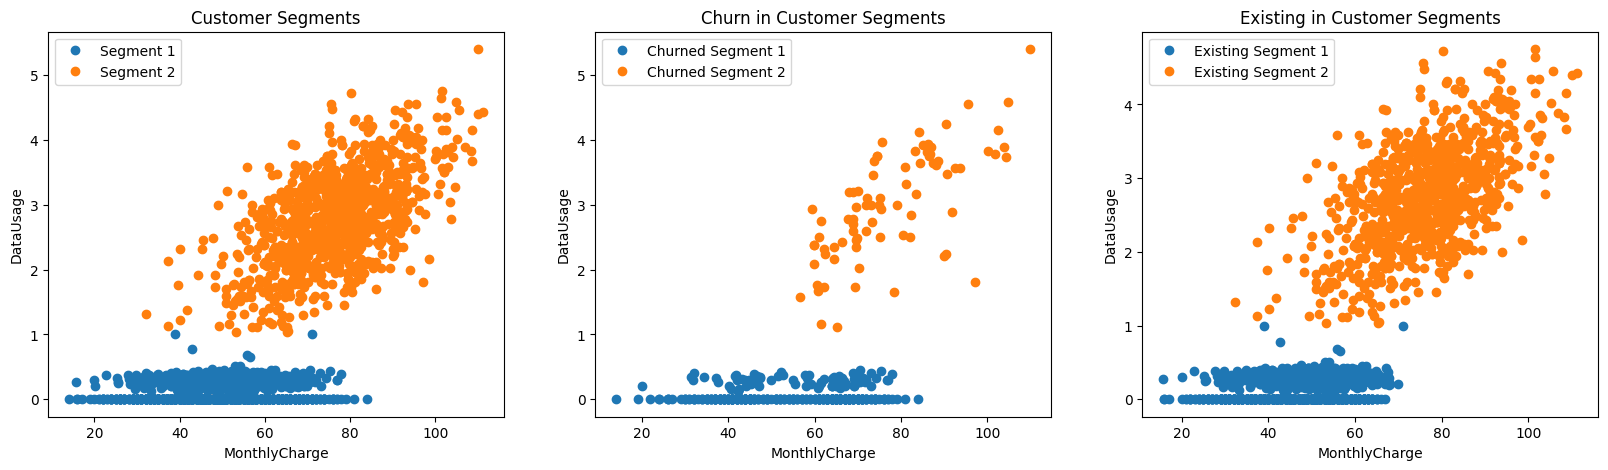

In [25]:
plt.figure(figsize=(20,5))

plt.subplot(131)
plt.plot(seg1['MonthlyCharge'], seg1['DataUsage'], 'o', label='Segment 1')
plt.plot(seg2['MonthlyCharge'], seg2['DataUsage'], 'o', label='Segment 2')
plt.title('Customer Segments')
plt.xlabel('MonthlyCharge')
plt.ylabel("DataUsage")
plt.legend()

plt.subplot(132)
plt.plot(seg11['MonthlyCharge'], seg11['DataUsage'], 'o', label='Churned Segment 1')
plt.plot(seg21['MonthlyCharge'], seg21['DataUsage'], 'o', label='Churned Segment 2')
plt.title('Churn in Customer Segments')
plt.xlabel('MonthlyCharge')
plt.ylabel("DataUsage")
plt.legend()

plt.subplot(133)
plt.plot(seg10['MonthlyCharge'], seg10['DataUsage'], 'o', label='Existing Segment 1')
plt.plot(seg20['MonthlyCharge'], seg20['DataUsage'], 'o', label='Existing Segment 2')
plt.title('Existing in Customer Segments')
plt.xlabel('MonthlyCharge')
plt.ylabel("DataUsage")
plt.legend();

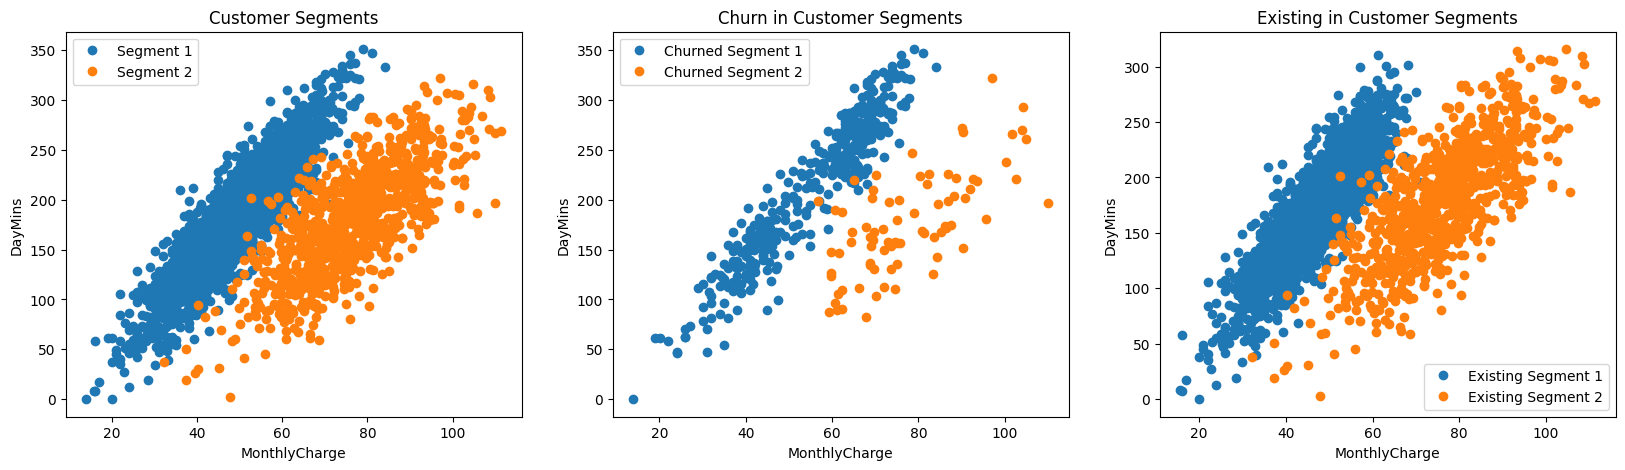

In [26]:
plt.figure(figsize=(20,5))

plt.subplot(131)
plt.plot(seg1['MonthlyCharge'], seg1['DayMins'], 'o', label='Segment 1')
plt.plot(seg2['MonthlyCharge'], seg2['DayMins'], 'o', label='Segment 2')
plt.title('Customer Segments')
plt.xlabel('MonthlyCharge')
plt.ylabel("DayMins")
plt.legend()

plt.subplot(132)
plt.plot(seg11['MonthlyCharge'], seg11['DayMins'], 'o', label='Churned Segment 1')
plt.plot(seg21['MonthlyCharge'], seg21['DayMins'], 'o', label='Churned Segment 2')
plt.title('Churn in Customer Segments')
plt.xlabel('MonthlyCharge')
plt.ylabel("DayMins")
plt.legend()

plt.subplot(133)
plt.plot(seg10['MonthlyCharge'], seg10['DayMins'], 'o', label='Existing Segment 1')
plt.plot(seg20['MonthlyCharge'], seg20['DayMins'], 'o', label='Existing Segment 2')
plt.title('Existing in Customer Segments')
plt.xlabel('MonthlyCharge')
plt.ylabel("DayMins")
plt.legend();

Segment 1. Customers who's usage is 0-1

In [27]:
seg1


,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
2,0,137,1,0,0.00,0,243.4,114,52.0,6.06,12.2
3,0,84,0,0,0.00,2,299.4,71,57.0,3.10,6.6
4,0,75,0,0,0.00,3,166.7,113,41.0,7.42,10.1
5,0,118,0,0,0.00,0,223.4,98,57.0,11.03,6.3
7,0,147,0,0,0.00,0,157.0,79,36.0,5.16,7.1
...,...,...,...,...,...,...,...,...,...,...,...
3326,0,96,1,0,0.36,1,106.6,128,46.6,14.24,14.9
3327,0,79,1,0,0.00,2,134.7,98,40.0,9.49,11.8
3329,0,68,1,0,0.34,3,231.1,57,56.4,7.67,9.6
3330,0,28,1,0,0.00,2,180.8,109,56.0,14.44,14.1


In [28]:
# % of customer churn in seg1
seg1["Churn"].value_counts(normalize=True) * 100


0    83.347107
1    16.652893
Name: Churn, dtype: float64

In [29]:
# % of customer having data plan in seg1
(seg1["DataPlan"].value_counts(normalize=True) * 100)

0    99.628099
1     0.371901
Name: DataPlan, dtype: float64

In [30]:
# list of customer having data plan in seg1, 9 customers
seg1.loc[seg1['DataPlan']==1]

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
343,0,98,1,1,0.00,2,64.6,98,26.0,8.81,0.0
383,0,117,0,1,1.00,1,196.0,82,71.0,16.14,3.7
595,0,87,1,1,0.00,1,151.4,95,39.0,7.62,0.0
2906,0,87,1,1,0.00,1,165.8,122,45.0,9.35,0.0
3022,0,123,1,1,0.78,0,146.6,87,42.8,5.74,2.9
3212,0,144,1,1,1.00,0,105.0,86,39.0,6.09,3.7
3216,0,221,1,1,0.65,0,180.5,85,56.5,11.21,2.4
3234,0,75,1,1,0.68,1,200.6,96,55.8,8.21,2.5
3275,0,120,1,1,0.00,1,128.5,115,36.0,8.19,0.0


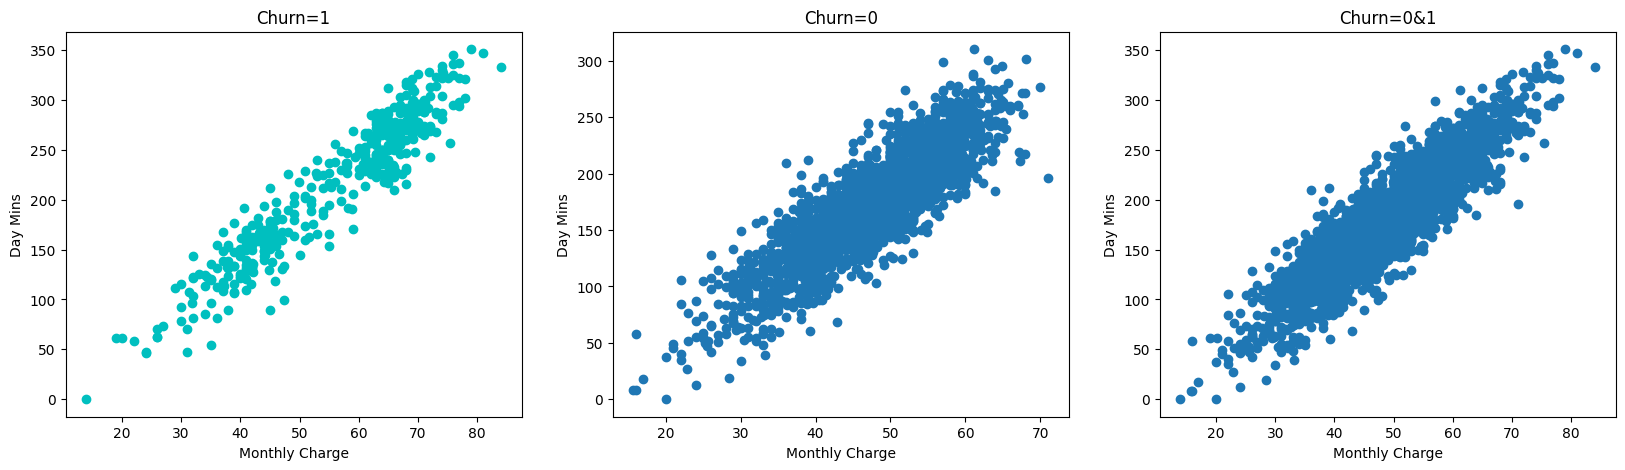

In [31]:
plt.figure(figsize=(20,5))

plt.subplot(131)
plt.plot(seg11["MonthlyCharge"], seg11["DayMins"], "co")
plt.xlabel("Monthly Charge")
plt.ylabel("Day Mins")
plt.title("Churn=1")

plt.subplot(132)
plt.plot(seg10["MonthlyCharge"], seg10["DayMins"], "o")
plt.xlabel("Monthly Charge")
plt.ylabel("Day Mins")
plt.title("Churn=0")

plt.subplot(133)
plt.plot(seg1["MonthlyCharge"], seg1["DayMins"], "o")
plt.xlabel("Monthly Charge")
plt.ylabel("Day Mins")
plt.title("Churn=0&1");

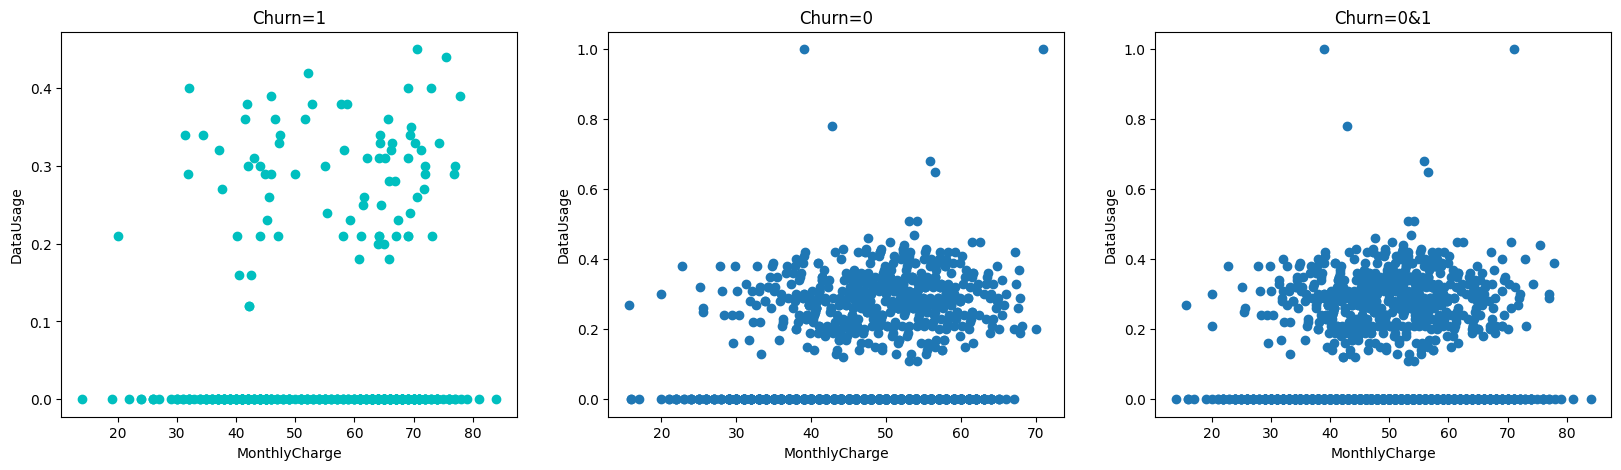

In [32]:
plt.figure(figsize=(20,5))

plt.subplot(131)
plt.plot(seg11["MonthlyCharge"], seg11["DataUsage"], "co")
plt.xlabel("MonthlyCharge")
plt.ylabel("DataUsage")
plt.title("Churn=1")

plt.subplot(132)
plt.plot(seg10["MonthlyCharge"], seg10["DataUsage"], "o")
plt.xlabel("MonthlyCharge")
plt.ylabel("DataUsage")
plt.title("Churn=0")

plt.subplot(133)
plt.plot(seg1["MonthlyCharge"], seg1["DataUsage"], "o")
plt.xlabel("MonthlyCharge")
plt.ylabel("DataUsage")
plt.title("Churn=0&1");

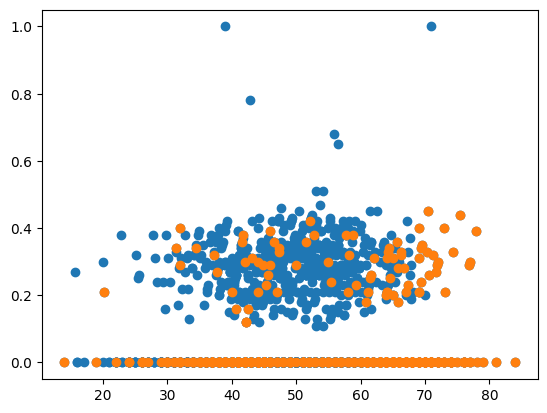

In [33]:
plt.plot(seg1["MonthlyCharge"], seg1["DataUsage"], "o") # All within seg1
plt.plot(seg11["MonthlyCharge"], seg11["DataUsage"], "o") # Churned within seg1


More on zero data usage customers

Text(0.5, 1.0, 'Churn=0&1')

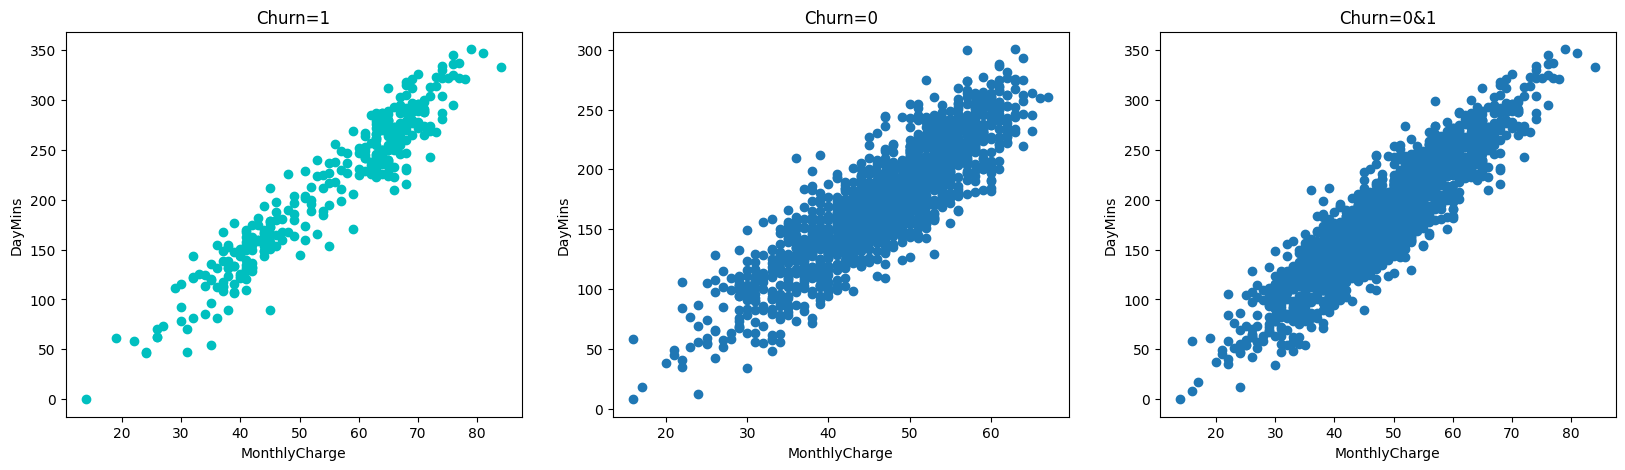

In [34]:
dataus0 = seg1.loc[seg1["DataUsage"]==0] # Customers with Data Usage zero in seg1.

dataus00 = dataus0.loc[dataus0["Churn"]==0] # Existing Customers with Data Usage zero in seg1.
dataus01 = dataus0.loc[dataus0["Churn"]==1] # Churned Customers with Data Usage zero in seg1.

plt.figure(figsize=(20,5))

plt.subplot(131)
plt.plot(dataus01["MonthlyCharge"], dataus01["DayMins"], "co")
plt.xlabel("MonthlyCharge")
plt.ylabel("DayMins")
plt.title("Churn=1")

plt.subplot(132)
plt.plot(dataus00["MonthlyCharge"], dataus00["DayMins"], "o")
plt.xlabel("MonthlyCharge")
plt.ylabel("DayMins")
plt.title("Churn=0")

plt.subplot(133)
plt.plot(dataus0["MonthlyCharge"], dataus0["DayMins"], "o")
plt.xlabel("MonthlyCharge")
plt.ylabel("DayMins")
plt.title("Churn=0&1")

In [35]:
dataus0

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
2,0,137,1,0,0.0,0,243.4,114,52.0,6.06,12.2
3,0,84,0,0,0.0,2,299.4,71,57.0,3.10,6.6
4,0,75,0,0,0.0,3,166.7,113,41.0,7.42,10.1
5,0,118,0,0,0.0,0,223.4,98,57.0,11.03,6.3
7,0,147,0,0,0.0,0,157.0,79,36.0,5.16,7.1
...,...,...,...,...,...,...,...,...,...,...,...
3322,1,62,1,0,0.0,4,321.1,105,78.0,13.28,11.5
3324,0,159,1,0,0.0,1,169.8,114,46.0,9.89,11.6
3327,0,79,1,0,0.0,2,134.7,98,40.0,9.49,11.8
3330,0,28,1,0,0.0,2,180.8,109,56.0,14.44,14.1


In [36]:
# % churn in customers with zero data usage in seg1
dataus0['Churn'].value_counts(normalize=True) * 100

0    82.239382
1    17.760618
Name: Churn, dtype: float64

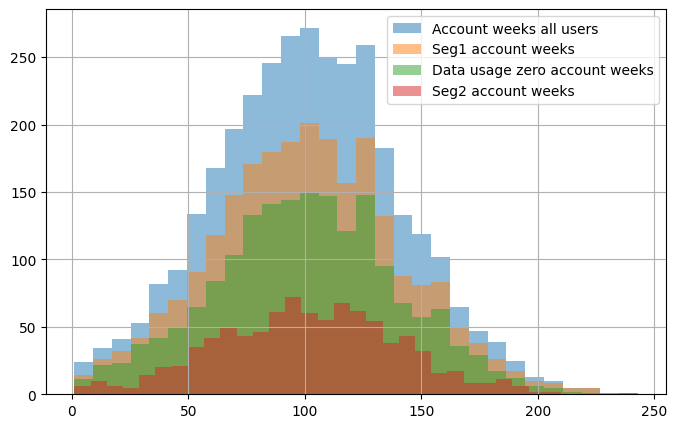

In [37]:
plt.figure(figsize=(8,5))
df["AccountWeeks"].hist(bins=30, alpha=0.5, label='Account weeks all users')
seg1["AccountWeeks"].hist(bins=30, alpha=0.5, label='Seg1 account weeks')
dataus0["AccountWeeks"].hist(bins=30, alpha=0.5, label='Data usage zero account weeks')
seg2["AccountWeeks"].hist(bins=30, alpha=0.5, label='Seg2 account weeks')
plt.legend();

Data users within segemet 1

In [38]:
dataus = seg1.loc[seg1["DataUsage"]>0]
dataus

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
8,0,117,1,0,0.19,1,184.5,97,63.9,17.58,8.7
10,1,65,1,0,0.29,4,129.1,137,44.9,11.43,12.7
11,0,74,1,0,0.34,0,187.7,127,49.4,8.17,9.1
13,0,95,1,0,0.44,3,156.6,88,52.4,12.38,12.3
20,0,147,1,0,0.31,0,155.1,117,50.1,11.99,10.6
...,...,...,...,...,...,...,...,...,...,...,...
3320,1,122,0,0,0.30,4,140.0,101,44.0,9.82,9.7
3323,1,117,1,0,0.39,5,118.4,126,45.9,12.47,13.6
3325,0,78,1,0,0.23,2,193.4,99,45.3,5.85,9.3
3326,0,96,1,0,0.36,1,106.6,128,46.6,14.24,14.9


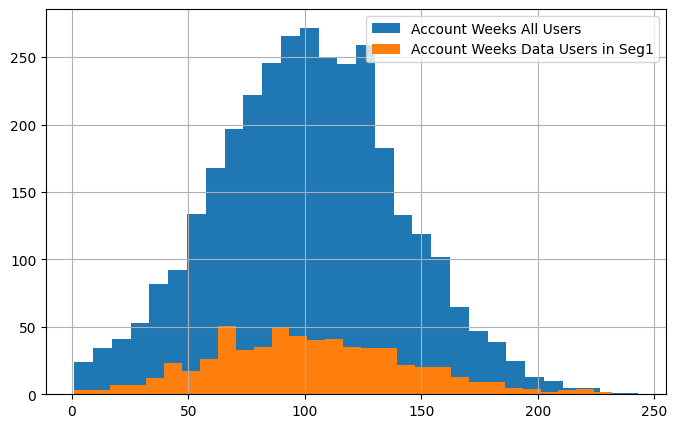

In [39]:
plt.figure(figsize=(8,5))
df["AccountWeeks"].hist(bins=30, label='Account Weeks All Users')
dataus["AccountWeeks"].hist(bins=30, label='Account Weeks Data Users in Seg1')
plt.legend()

In [40]:
# % Churn in Custoemrs with data usege in seg1
dataus["Churn"].value_counts(normalize=True) * 100

0    86.655684
1    13.344316
Name: Churn, dtype: float64

Segment 2. Customers who's data usage is >1

In [41]:
seg2

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
0,0,128,1,1,2.70,1,265.1,110,89.0,9.87,10.0
1,0,107,1,1,3.70,1,161.6,123,82.0,9.78,13.7
6,0,121,1,1,2.03,3,218.2,88,87.3,17.43,7.5
9,0,141,0,1,3.02,0,258.6,84,93.2,11.10,11.2
16,0,85,1,1,3.73,1,196.4,139,95.3,14.05,13.8
...,...,...,...,...,...,...,...,...,...,...,...
3306,0,106,1,1,2.19,1,83.6,131,53.9,10.20,8.1
3315,0,149,1,1,1.76,0,148.5,106,52.6,5.73,6.5
3316,0,103,1,1,3.32,0,164.1,111,80.2,10.96,12.3
3328,0,192,1,1,2.67,2,156.2,77,71.7,10.78,9.9


In [42]:
# % Churn in seg2.
seg2["Churn"].value_counts(normalize=True) * 100

0    91.237678
1     8.762322
Name: Churn, dtype: float64

In [43]:
# Every custoemrs has data plan in seg2
seg2["DataPlan"].value_counts()

1    913
Name: DataPlan, dtype: int64

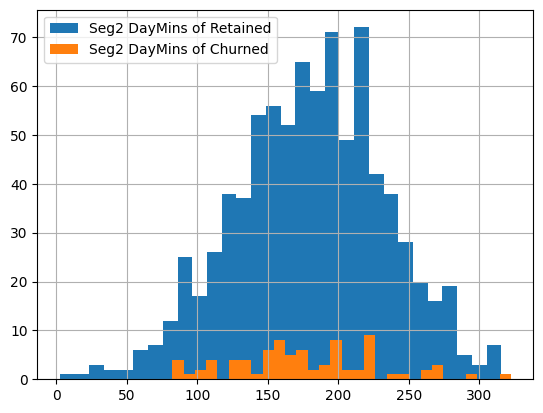

In [44]:
seg20["DayMins"].hist(bins=30, label='Seg2 DayMins of Retained')
seg21["DayMins"].hist(bins=30, label='Seg2 DayMins of Churned')
plt.legend();

Segment 2 Data Usage

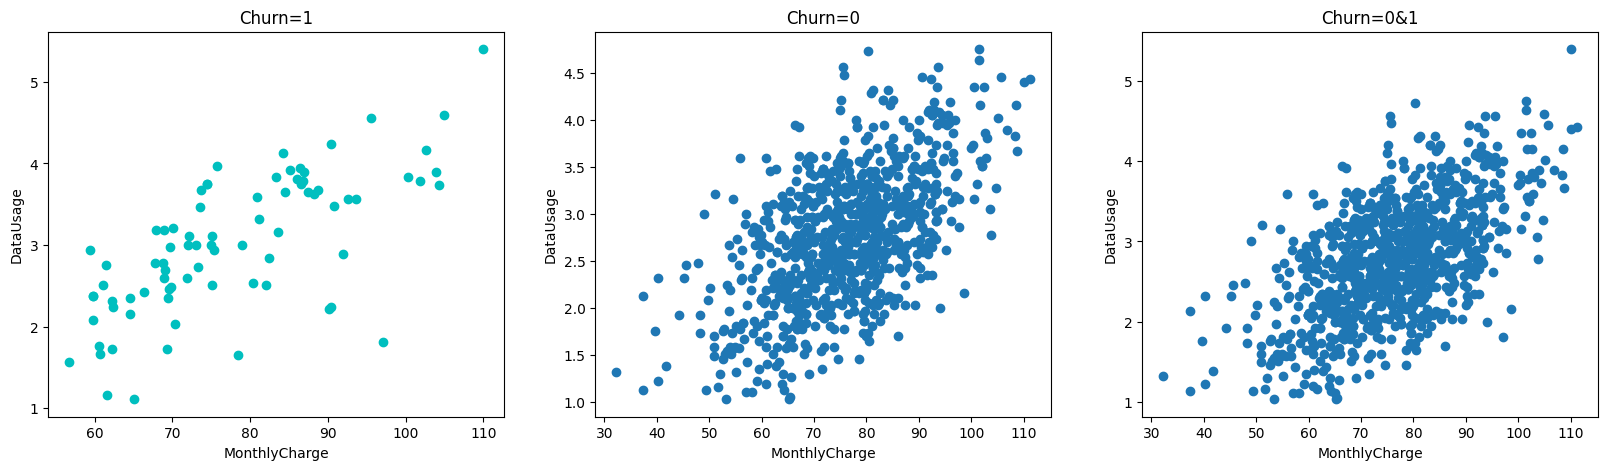

In [45]:
plt.figure(figsize=(20,5))

plt.subplot(131)
plt.plot(seg21["MonthlyCharge"], seg21["DataUsage"], "co")
plt.xlabel("MonthlyCharge")
plt.ylabel("DataUsage")
plt.title("Churn=1")

plt.subplot(132)
plt.plot(seg20["MonthlyCharge"], seg20["DataUsage"], "o")
plt.xlabel("MonthlyCharge")
plt.ylabel("DataUsage")
plt.title("Churn=0")

plt.subplot(133)
plt.plot(seg2["MonthlyCharge"], seg2["DataUsage"], "o")
plt.xlabel("MonthlyCharge")
plt.ylabel("DataUsage")
plt.title("Churn=0&1");

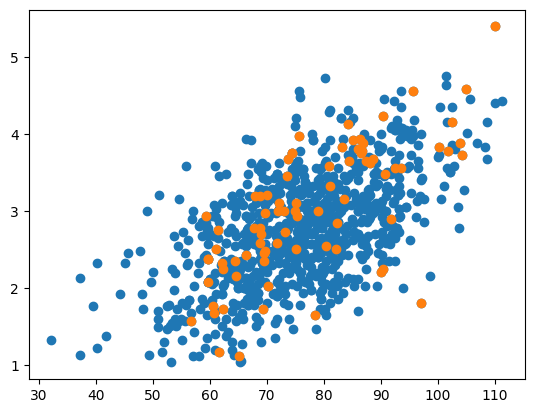

In [46]:
plt.plot(seg2["MonthlyCharge"], seg2["DataUsage"], "o")
plt.plot(seg21["MonthlyCharge"], seg21["DataUsage"], "o");

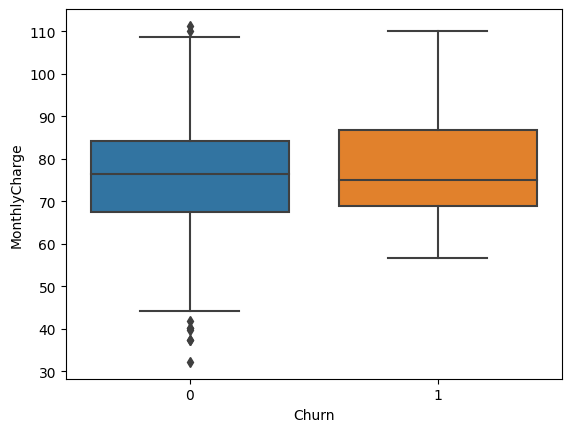

In [47]:
sns.boxplot(x="Churn", y="MonthlyCharge", data=seg2);

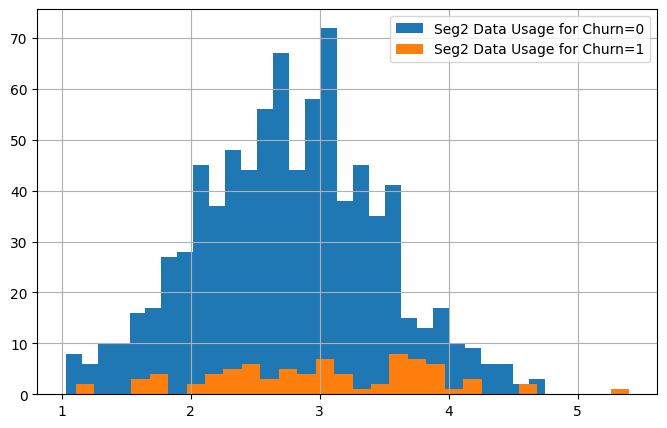

In [48]:
plt.figure(figsize=(8,5))
seg20["DataUsage"].hist(bins=30, label='Seg2 Data Usage for Churn=0')
seg21["DataUsage"].hist(bins=30, label='Seg2 Data Usage for Churn=1')
plt.legend();

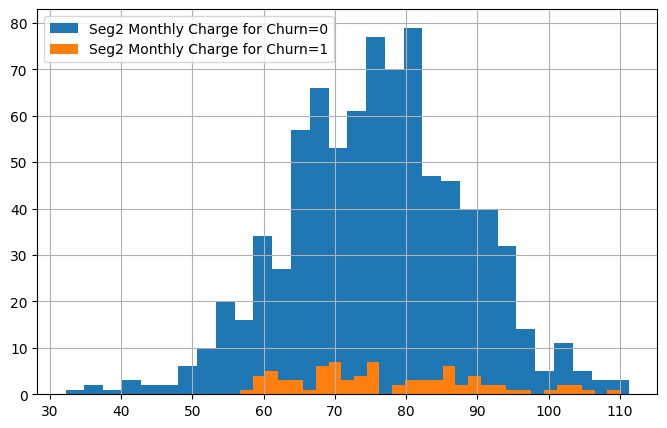

In [49]:
plt.figure(figsize=(8,5))
seg20["MonthlyCharge"].hist(bins=30, label='Seg2 Monthly Charge for Churn=0')
seg21["MonthlyCharge"].hist(bins=30, label='Seg2 Monthly Charge for Churn=1')
plt.legend();

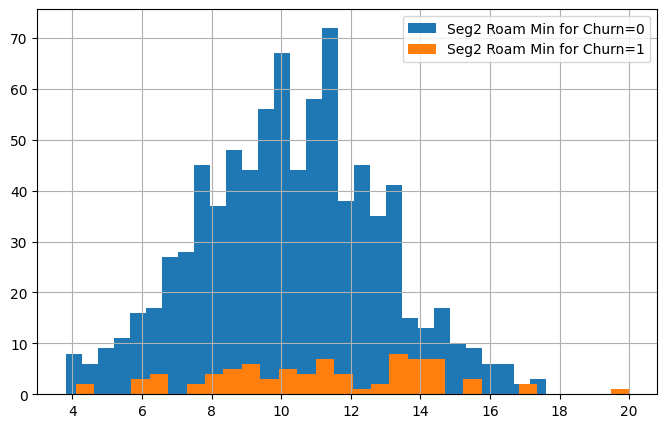

In [50]:
plt.figure(figsize=(8,5))
seg20["RoamMins"].hist(bins=30, label='Seg2 Roam Min for Churn=0')
seg21["RoamMins"].hist(bins=30, label='Seg2 Roam Min for Churn=1')
plt.legend();

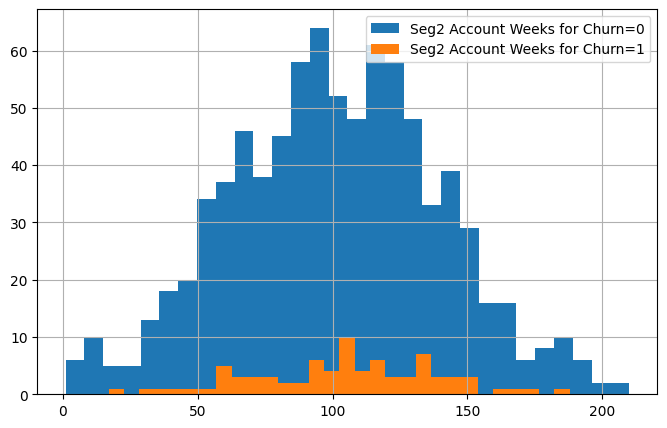

In [51]:
plt.figure(figsize=(8,5))
seg20["AccountWeeks"].hist(bins=30, label='Seg2 Account Weeks for Churn=0')
seg21["AccountWeeks"].hist(bins=30, label='Seg2 Account Weeks for Churn=1')
plt.legend() ;

Seg 1 & Seg2 DayMins

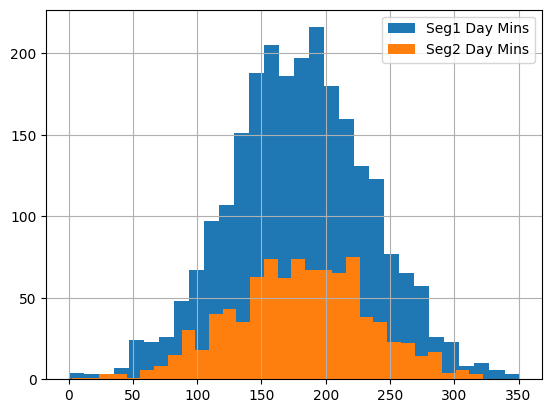

In [52]:
seg1['DayMins'].hist(bins=30, label='Seg1 Day Mins')
seg2['DayMins'].hist(bins=30, label='Seg2 Day Mins')
plt.legend();

In [53]:
seg1['DayMins'].mean()

179.7163223140496

In [54]:
seg2['DayMins'].mean()

179.93088718510404

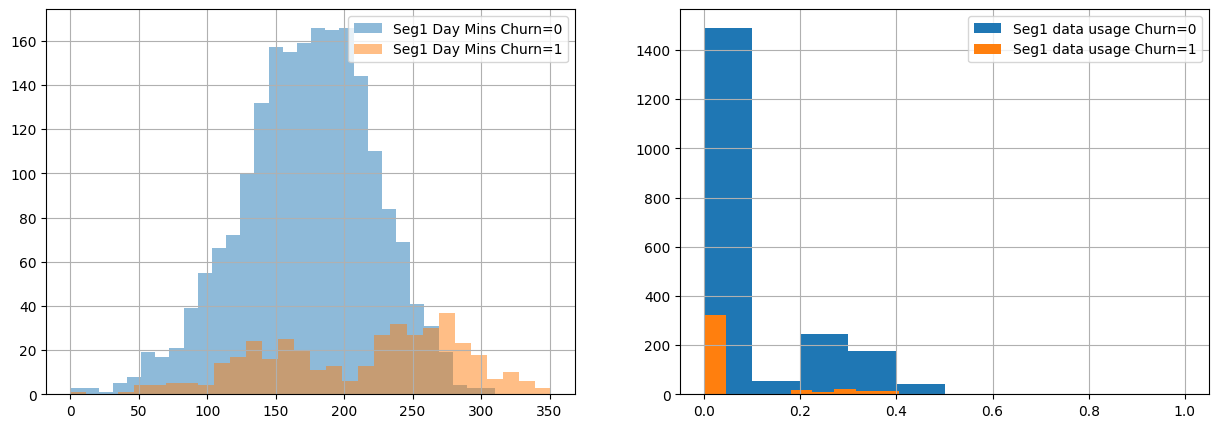

In [55]:
plt.figure(figsize=(15,5))

plt.subplot(121)
seg10["DayMins"].hist(bins=30, alpha=0.5, label='Seg1 Day Mins Churn=0')
seg11["DayMins"].hist(bins=30, alpha=0.5, label='Seg1 Day Mins Churn=1')
plt.legend()

plt.subplot(122)
seg10["DataUsage"].hist(label='Seg1 data usage Churn=0')
seg11["DataUsage"].hist(label='Seg1 data usage Churn=1')
plt.legend();

<AxesSubplot:xlabel='DataUsage', ylabel='Churn'>

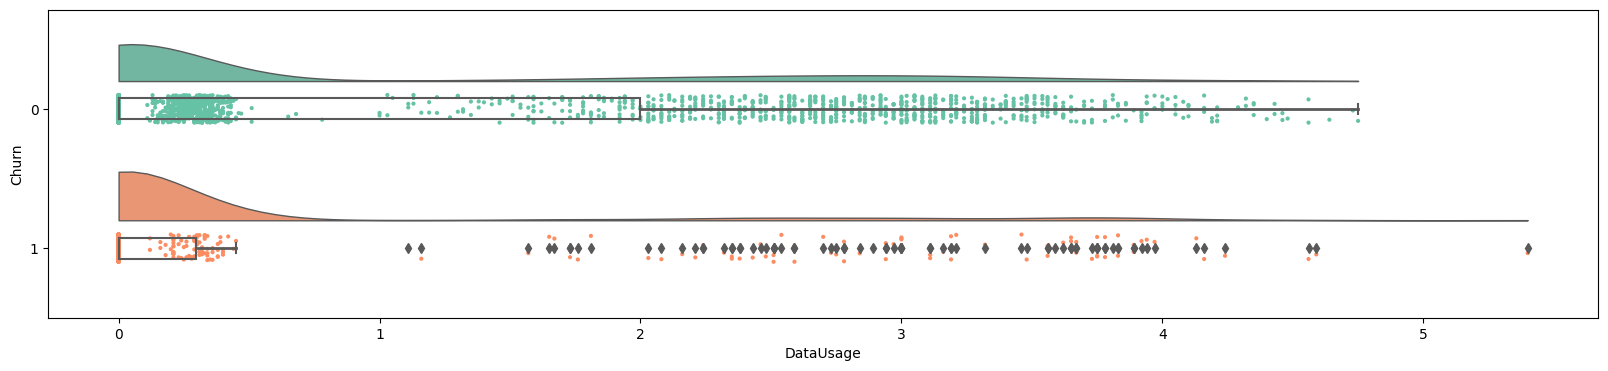

In [56]:
plt.figure(figsize=(20,4))
ptitprince.RainCloud(data = df, x = 'Churn', y = 'DataUsage', orient = 'h')

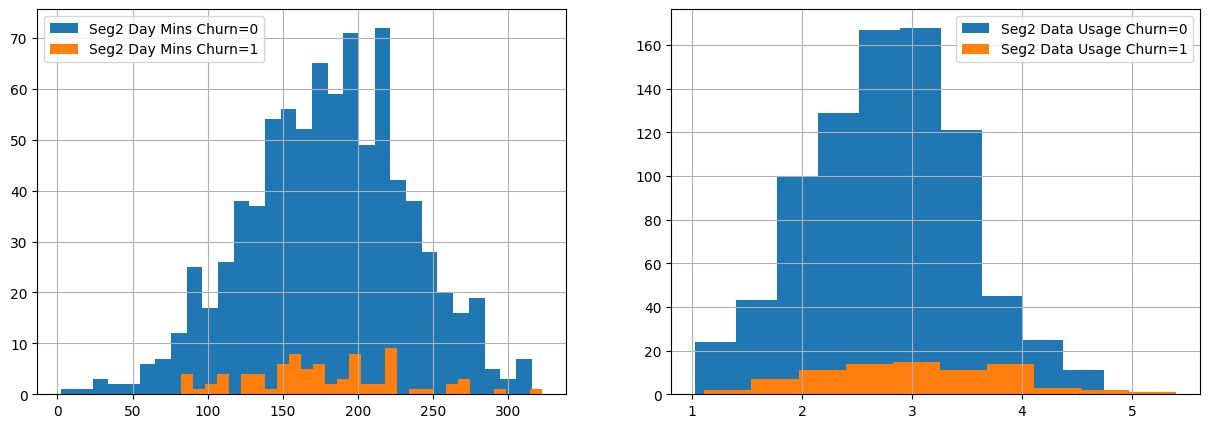

In [57]:
plt.figure(figsize=(15,5))

plt.subplot(121)
seg20["DayMins"].hist(bins=30, label='Seg2 Day Mins Churn=0')
seg21["DayMins"].hist(bins=30, label='Seg2 Day Mins Churn=1')
plt.legend()

plt.subplot(122)
seg20["DataUsage"].hist(label='Seg2 Data Usage Churn=0')
seg21["DataUsage"].hist(label='Seg2 Data Usage Churn=1')
plt.legend();

Seg1 & Seg2 Monthly Charges

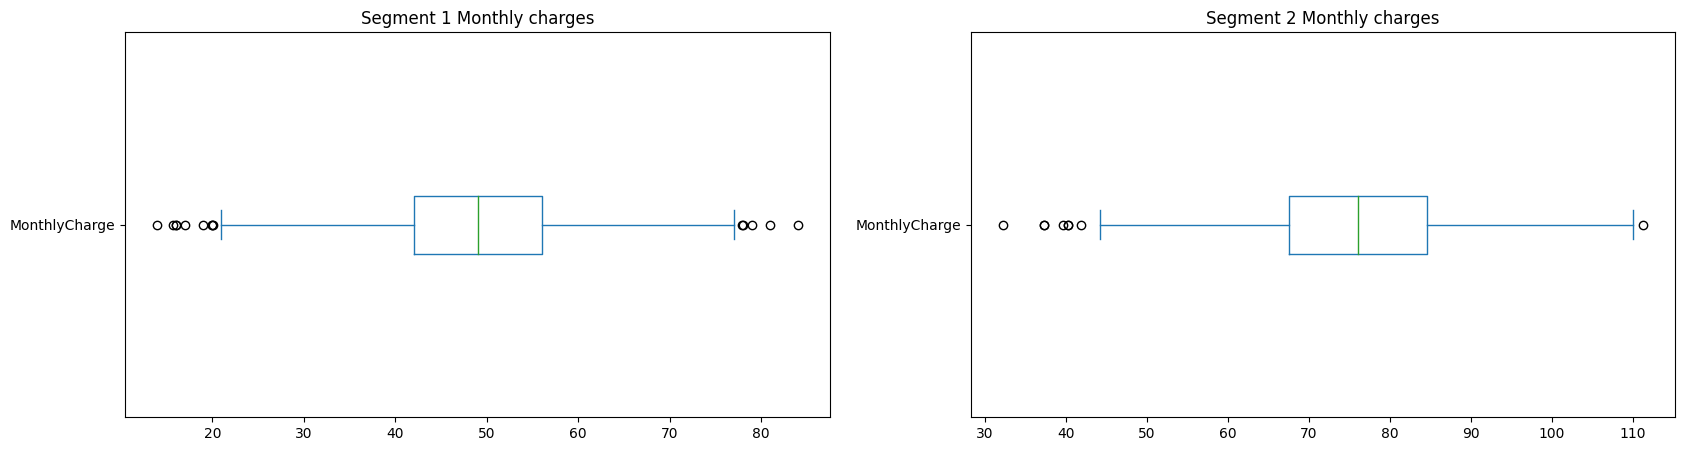

In [58]:
plt.figure(figsize=(20,5))
plt.subplot(121)
seg1["MonthlyCharge"].plot(kind="box", vert=False, title="Segment 1 Monthly charges")
plt.subplot(122)
seg2["MonthlyCharge"].plot(kind="box", vert=False, title="Segment 2 Monthly charges");

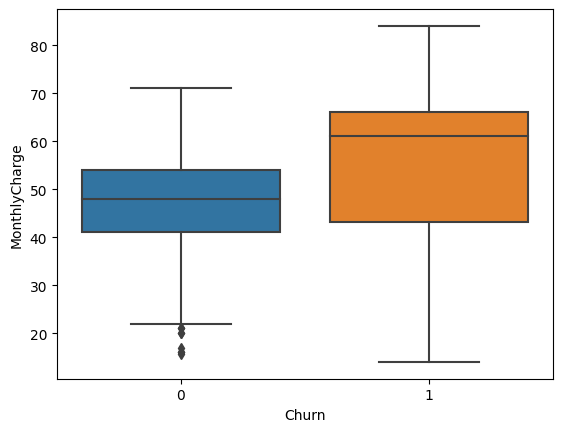

In [59]:
sns.boxplot(x="Churn", y="MonthlyCharge", data=seg1);


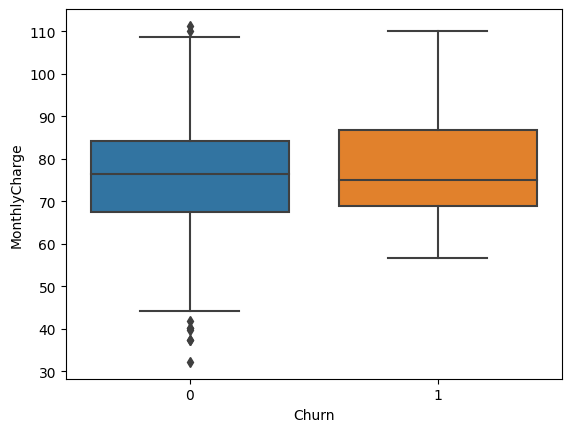

In [60]:
sns.boxplot(x="Churn", y="MonthlyCharge", data=seg2);


SUM of Monthly Charges seg1 & 2

Sum of Monthly Charge in seg1 = 118104.1
Sum of Monthly Charge in seg2 = 69561.0


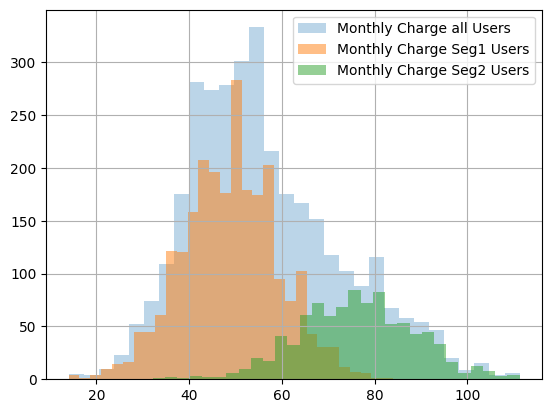

In [61]:
df["MonthlyCharge"].hist(bins=30, alpha=0.3, label='Monthly Charge all Users')
seg1["MonthlyCharge"].hist(bins=30, alpha=0.5, label='Monthly Charge Seg1 Users')
seg2["MonthlyCharge"].hist(bins=30, alpha=0.5,label='Monthly Charge Seg2 Users')
plt.legend()

print("Sum of Monthly Charge in seg1 =", seg1["MonthlyCharge"].sum())
print("Sum of Monthly Charge in seg2 =", seg2["MonthlyCharge"].sum())

Roaming

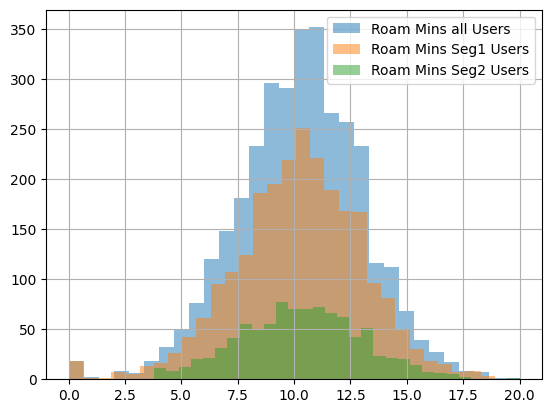

In [62]:
df["RoamMins"].hist(bins=30, alpha=0.5, label='Roam Mins all Users')
seg1["RoamMins"].hist(bins=30, alpha=0.5, label='Roam Mins Seg1 Users')
seg2["RoamMins"].hist(bins=30, alpha=0.5, label='Roam Mins Seg2 Users')
plt.legend();

20426.3 mins, per 2017 customers who not churned.
4276.5 mins, per 403 customers who churned.


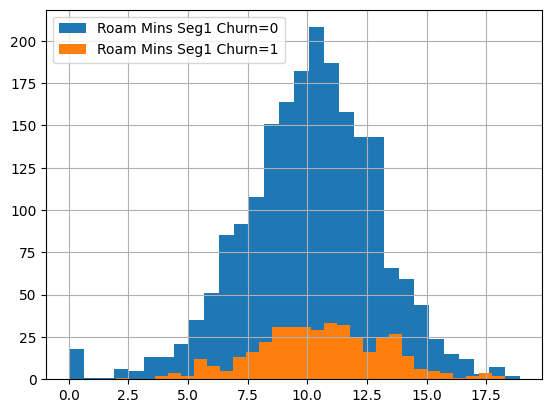

In [63]:
seg10["RoamMins"].hist(bins=30, label='Roam Mins Seg1 Churn=0')
seg11["RoamMins"].hist(bins=30, label='Roam Mins Seg1 Churn=1')
plt.legend()

print(f"{seg10.RoamMins.sum()} mins, per {len(seg10.RoamMins)} customers who not churned.")
print(f"{seg11.RoamMins.sum()} mins, per {len(seg11.RoamMins)} customers who churned.")

8526.5 mins, per 833 customers who not churned.
891.6000000000001 mins, per 80 customers who churned.


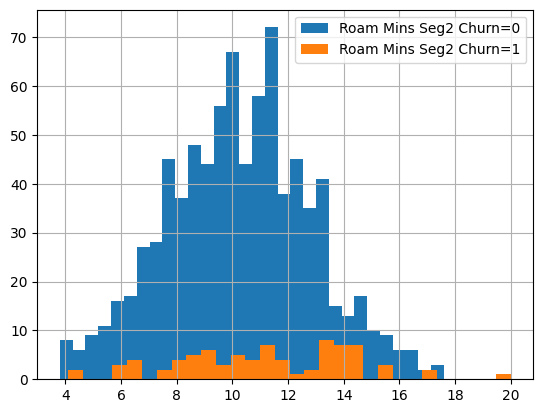

In [64]:
seg20["RoamMins"].hist(bins=30, label='Roam Mins Seg2 Churn=0')
seg21["RoamMins"].hist(bins=30, label='Roam Mins Seg2 Churn=1')
plt.legend()

print(f"{seg20.RoamMins.sum()} mins, per {len(seg20.RoamMins)} customers who not churned.")
print(f"{seg21.RoamMins.sum()} mins, per {len(seg21.RoamMins)} customers who churned.")

Customer Service Calls

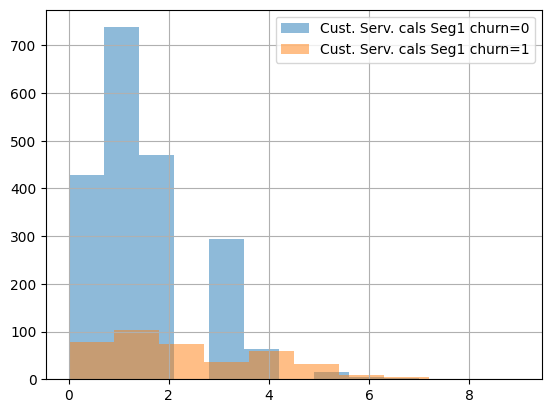

In [65]:
seg10["CustServCalls"].hist(alpha=0.5, label='Cust. Serv. cals Seg1 churn=0')
seg11["CustServCalls"].hist(alpha=0.5, label='Cust. Serv. cals Seg1 churn=1')
plt.legend();


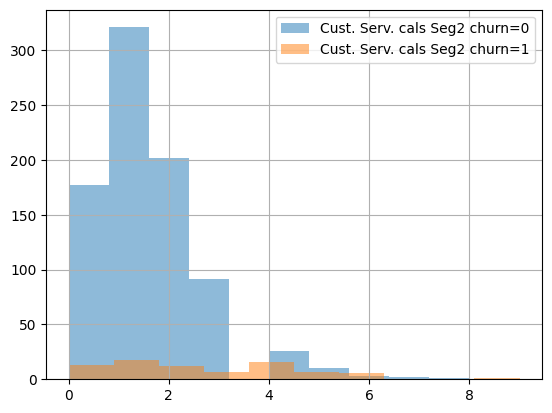

In [66]:
seg20["CustServCalls"].hist(alpha=0.5, label='Cust. Serv. cals Seg2 churn=0')
seg21["CustServCalls"].hist(alpha=0.5, label='Cust. Serv. cals Seg2 churn=1')
plt.legend();

Contract Renewal

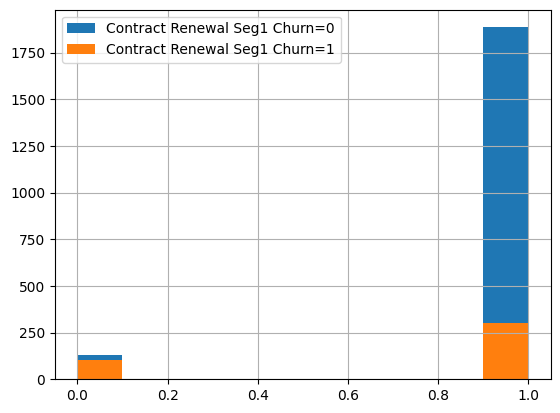

In [67]:
seg10["ContractRenewal"].hist(label='Contract Renewal Seg1 Churn=0')
seg11["ContractRenewal"].hist(label='Contract Renewal Seg1 Churn=1')
plt.legend() ;

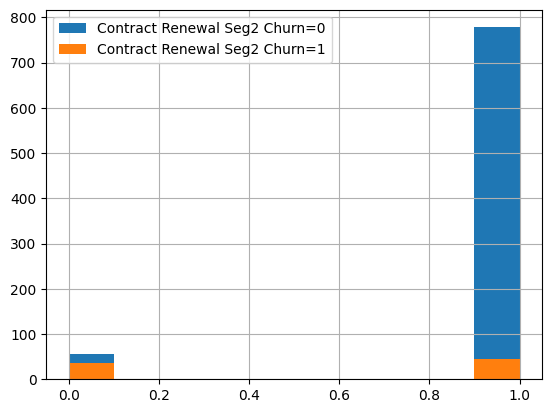

In [68]:
seg20["ContractRenewal"].hist(label='Contract Renewal Seg2 Churn=0')
seg21["ContractRenewal"].hist(label='Contract Renewal Seg2 Churn=1')
plt.legend();

### Customer Retention Steps

- Increased calls to Customer Service indicate a higher likelihood of customer churn.
- Adjust talk time pricing to better suit segment 1 customers.
- Quickly introduce data plans for customers currently using data without an existing plan.
- Offer attractive data plans specifically for segment 1 customers.
- If feasible, adjusting data plan pricing may also help retain segment 2 customers.

### Hypothesis Testing

- **Null Hypothesis**: Customers using data without a subscribed data plan are more likely to churn.
- **Alternate Hypothesis**: Customers using data without a subscribed data plan are not more likely to churn.

---


### Permutation Test for Churn Ratio

- A random sample of 20 customers will be selected.
- These 20 customers will be divided into two groups:
  - **Group 2**: Customers who are using data without subscribing to a data plan.
  - **Group 1**: All other customers who do not fall into Group 2.
- Calculate the churn ratio for each group and compare the results.

In [69]:
# 1000 Permutations
# churn in only customers using data without dataplan

population_churn = []   # Remaining customers (not in Group2) churn % in sample (Group 1)
no_data_plan_churn = []   # Churn % in data users, without data plan (Group 2)

for i in range(0,1000):
  sample = df.sample(n=20)
  sample_churn = sample.loc[~(sample['DataPlan']==0)&(sample['DataUsage']>0)]['Churn'].value_counts(normalize=True)
  sample_churn_data_plan = sample.loc[(sample['DataPlan']==0)&(sample['DataUsage']>0)]['Churn'].value_counts(normalize=True)
  population_churn.append(sample_churn)
  no_data_plan_churn.append(sample_churn_data_plan)


In [70]:
sample_churn
sample_churn_data_plan

0    1.0
Name: Churn, dtype: float64

In [71]:
population_churn = pd.DataFrame(population_churn)
no_data_plan_churn = pd.DataFrame(no_data_plan_churn)

The means of samples are significanly diffrent



In [72]:
population_churn[1].mean()


0.22732674388259494

In [73]:
no_data_plan_churn[1].mean()


0.3586716586716586

Distplot shows lower density than next plot means a null hypothesis is going right.



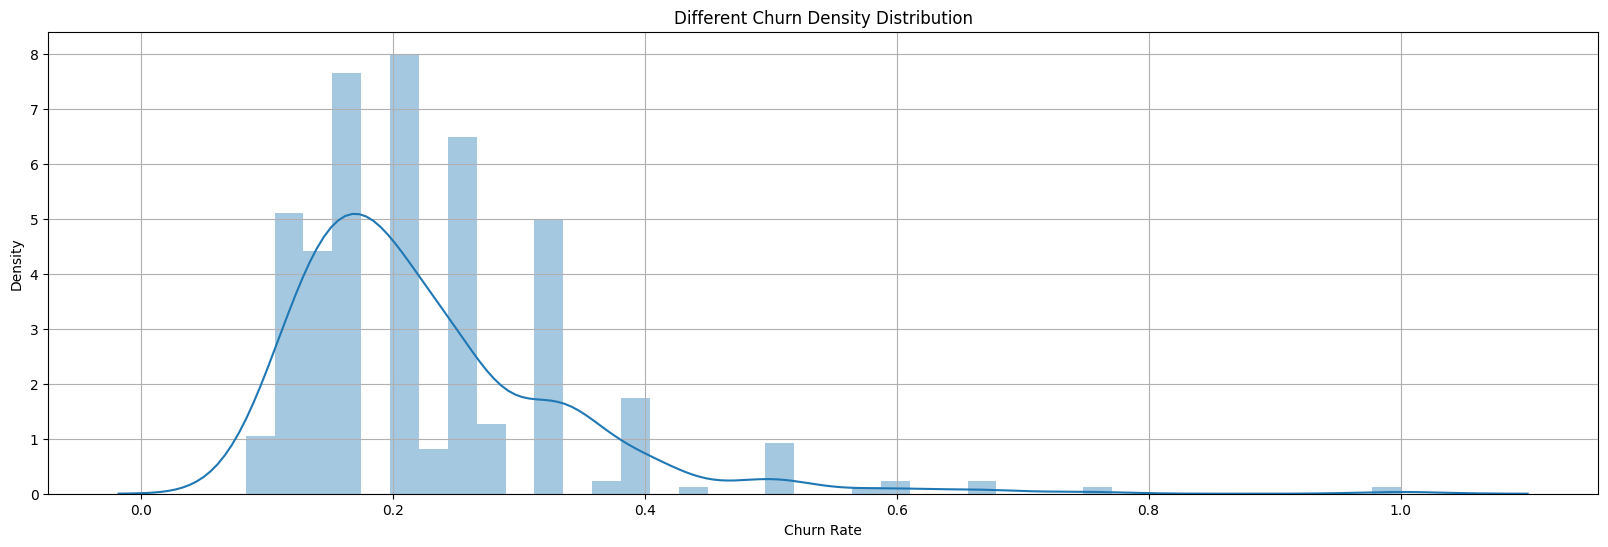

In [74]:
plt.figure(figsize=(20, 6))

sns.distplot(population_churn[1], kde=True, );
plt.title("Different Churn Density Distribution")
plt.xlabel("Churn Rate")
plt.ylabel("Density")
plt.grid()
plt.show()

Distplot shows higher density than the previous plot means a null hypothesis is going right.



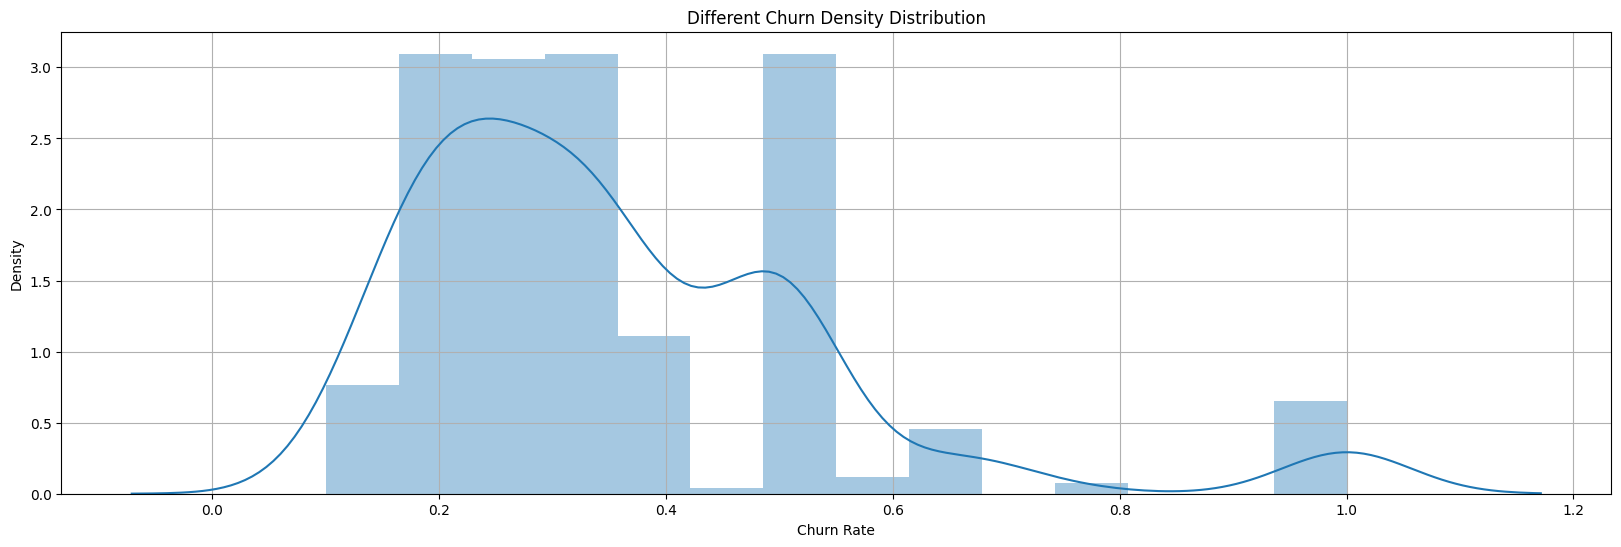

In [75]:
plt.figure(figsize=(20, 6))

sns.distplot(no_data_plan_churn[1]);
plt.title("Different Churn Density Distribution")
plt.xlabel("Churn Rate")
plt.ylabel("Density")
plt.grid()
plt.show()

In [76]:
permutation_results = pd.concat([population_churn, no_data_plan_churn], axis=1, ignore_index=True)
permutation_results.reset_index(drop=True, inplace=True)

In [77]:
dff = permutation_results
dff.fillna(0, inplace=True)
dff['Result'] = dff[3] - dff[1]
dff

,0,1,2,3,Result
0,0.800000,0.200000,1.000000,0.000000,-0.200000
1,1.000000,0.000000,0.000000,1.000000,1.000000
2,1.000000,0.000000,1.000000,0.000000,0.000000
3,1.000000,0.000000,0.000000,1.000000,1.000000
4,0.750000,0.250000,0.000000,1.000000,0.750000
...,...,...,...,...,...
995,1.000000,0.000000,0.333333,0.666667,0.666667
996,0.888889,0.111111,0.000000,1.000000,0.888889
997,0.833333,0.166667,0.000000,1.000000,0.833333
998,0.666667,0.333333,0.500000,0.500000,0.166667


In [78]:
len(dff.loc[dff['Result']>=0]) * 100 / len(dff)


98.4

In [79]:
len(dff.loc[dff['Result']<0]) * 100 / len(dff)

1.6

- ~70% of experiments are in favor of the null hypothesis.
- Null hypothesis accepted.
- All conclusions on customer analysis are going right.

## Random Under-Sampling

In [80]:
df['Churn'].value_counts()


0    2850
1     483
Name: Churn, dtype: int64

In [81]:
# Random under-sampleing
df2 = df.loc[df['Churn']==0].sample(n=483).copy()
# All Churned Customers
df3 = df.loc[df['Churn']==1].copy()

# Concat all customers, with new index on raws
df4 = pd.concat([df2,df3], ignore_index=True)

# Shuffle raws randomly
df4 = df4.sample(frac=1)

# Reset index of every raws
df4.reset_index(drop=True, inplace=True)

df4

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
0,0,85,1,0,0.40,1,201.4,52,58.0,11.47,12.0
1,1,125,0,1,4.59,1,260.8,81,104.9,8.19,17.0
2,0,146,1,1,3.94,1,176.6,88,83.4,8.14,14.6
3,1,63,1,0,0.00,0,261.8,69,66.0,12.25,14.7
4,0,145,0,1,3.00,1,175.3,107,73.0,7.67,11.1
...,...,...,...,...,...,...,...,...,...,...,...
961,0,110,1,0,0.00,3,185.1,100,46.0,8.26,6.3
962,1,57,1,0,0.00,2,272.7,74,66.0,11.25,10.5
963,1,115,0,0,0.00,1,345.3,81,76.0,10.17,11.8
964,1,82,1,0,0.21,0,300.3,109,69.1,9.05,11.7


## Exploratory Data Analysis (EDA)

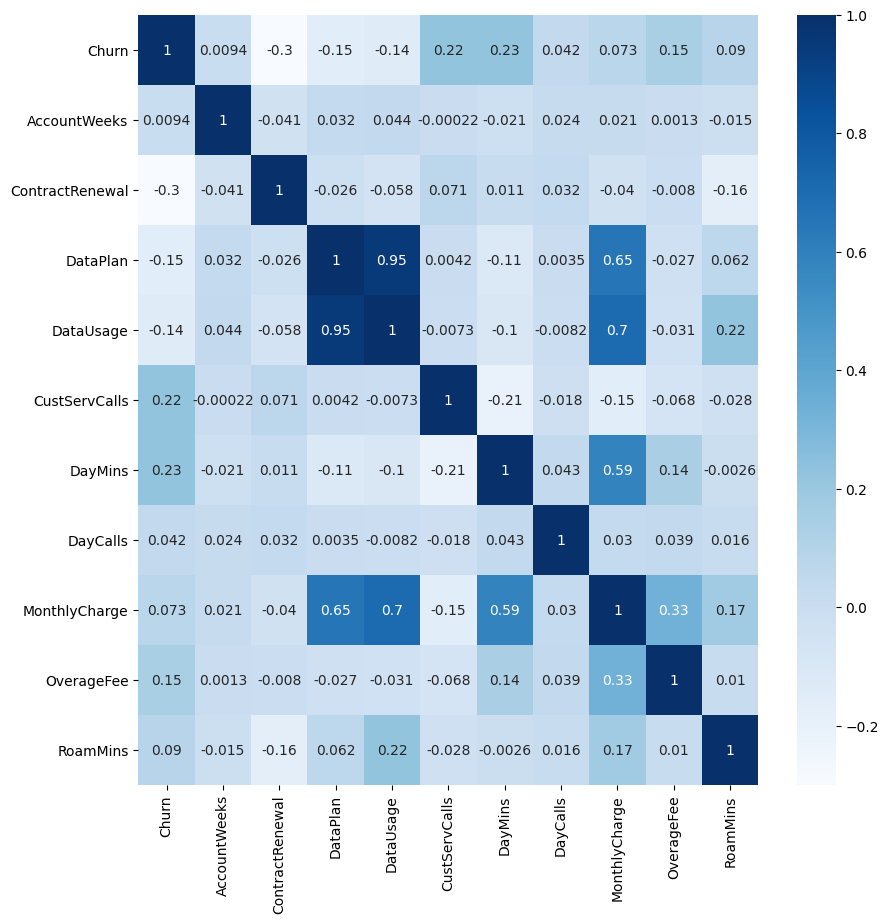

In [82]:
plt.figure(figsize=(10, 10))
sns.heatmap(df4.corr(), annot= True , cmap='Blues');

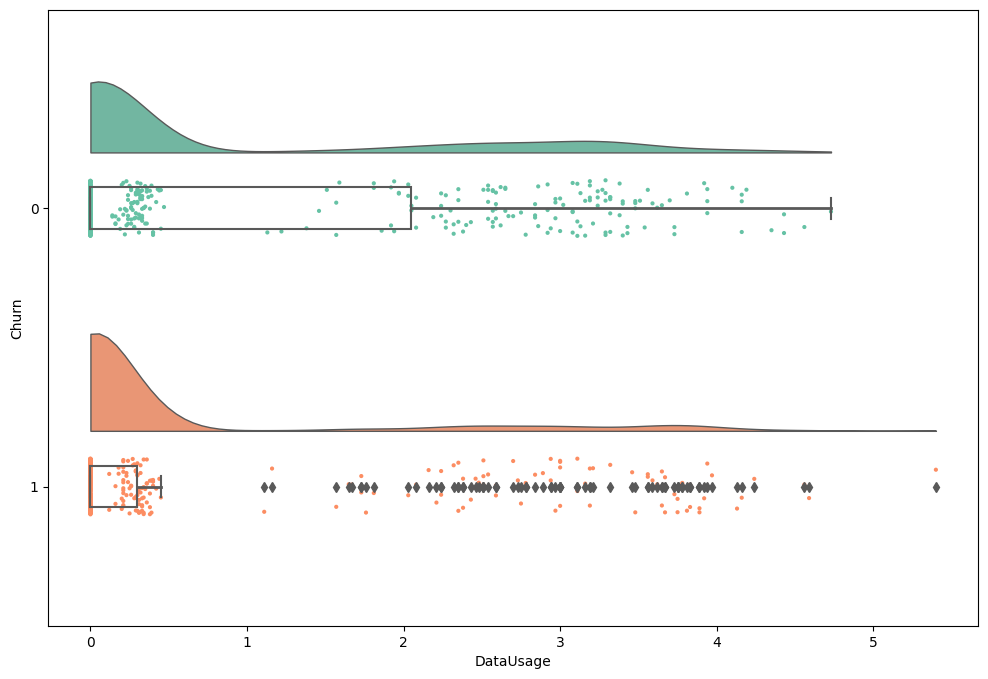

In [84]:
plt.figure(figsize = (12,8))
ptitprince.RainCloud(data = df4, x= 'Churn', y= 'DataUsage', orient='h');

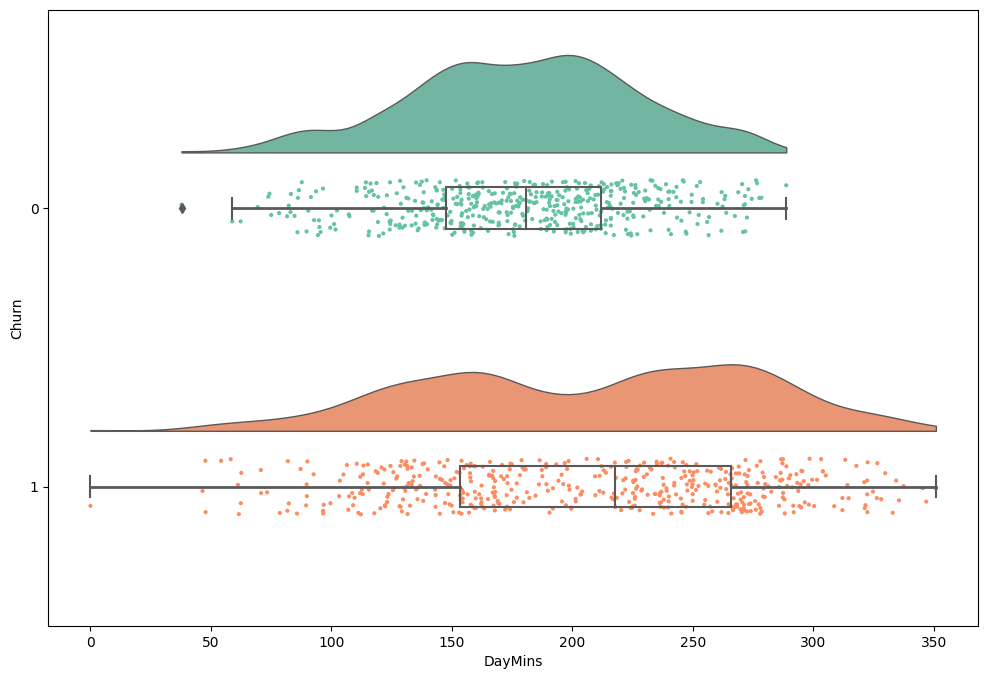

In [85]:
plt.figure(figsize = (12,8))
ptitprince.RainCloud(data = df4, x= 'Churn', y= 'DayMins', orient='h');

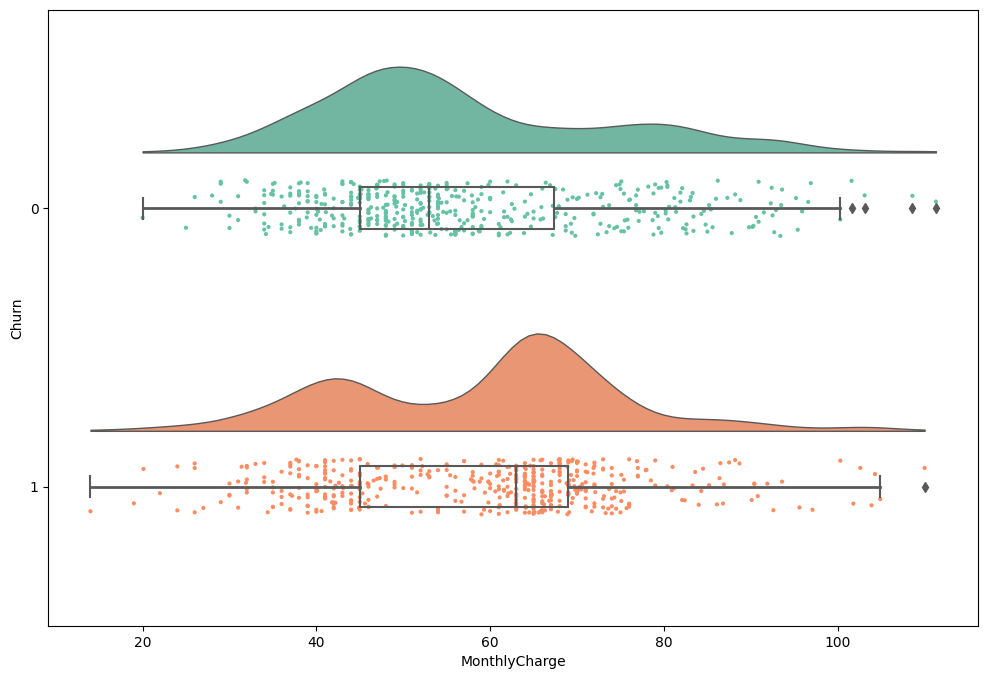

In [86]:
plt.figure(figsize = (12,8))
ptitprince.RainCloud(data = df4, x= 'Churn', y= 'MonthlyCharge', orient='h');

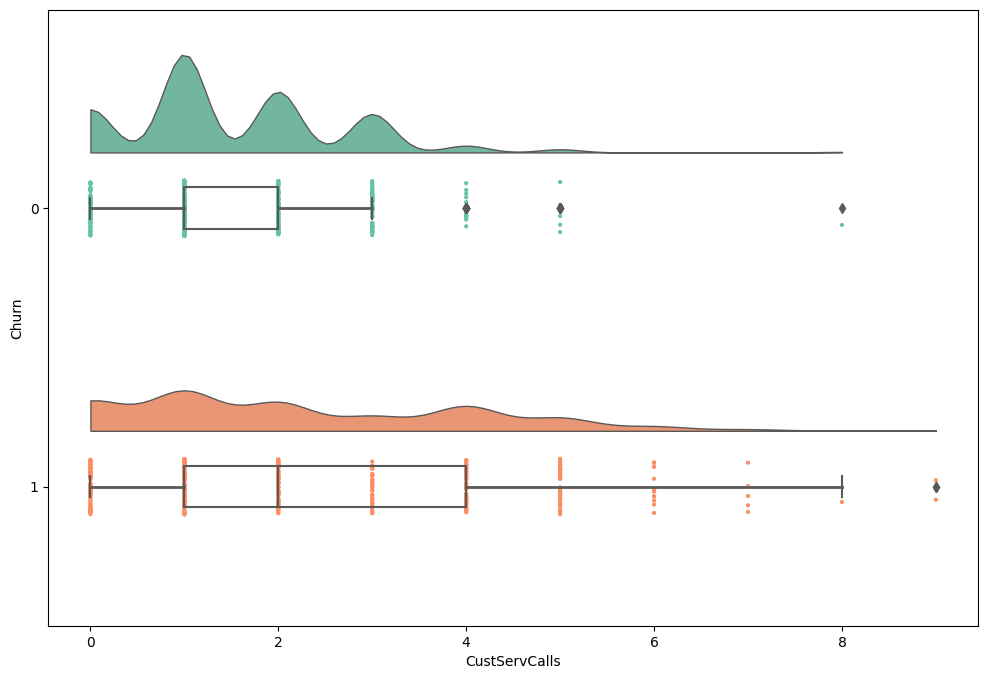

In [87]:
plt.figure(figsize = (12,8))
ptitprince.RainCloud(data = df4, x= 'Churn', y= 'CustServCalls', orient='h');

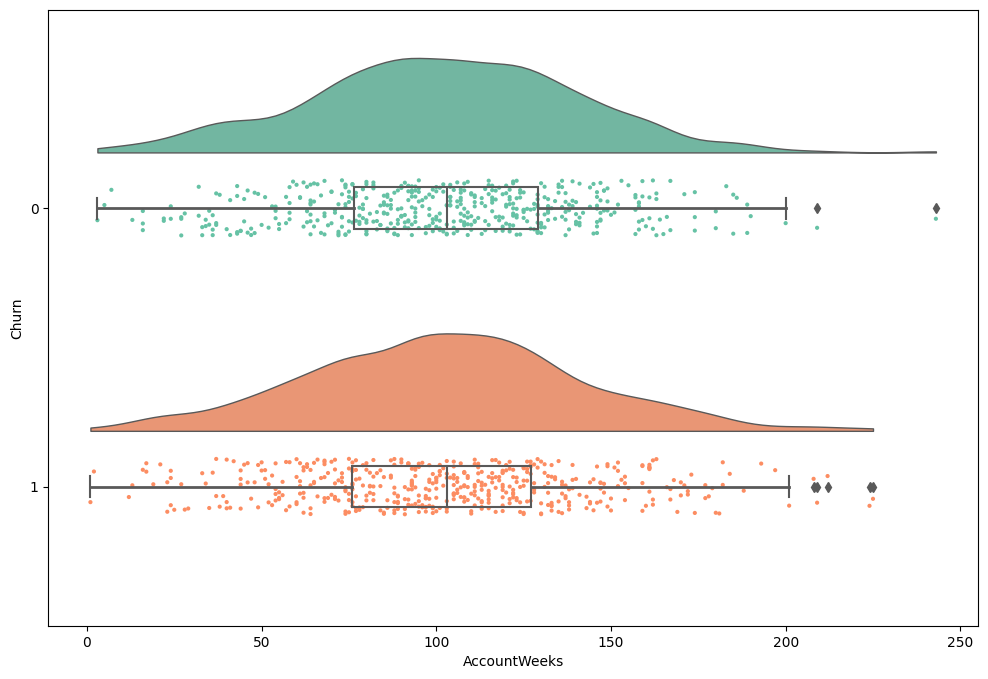

In [88]:
plt.figure(figsize = (12,8))
ptitprince.RainCloud(data = df4, x= 'Churn', y= 'AccountWeeks', orient='h');

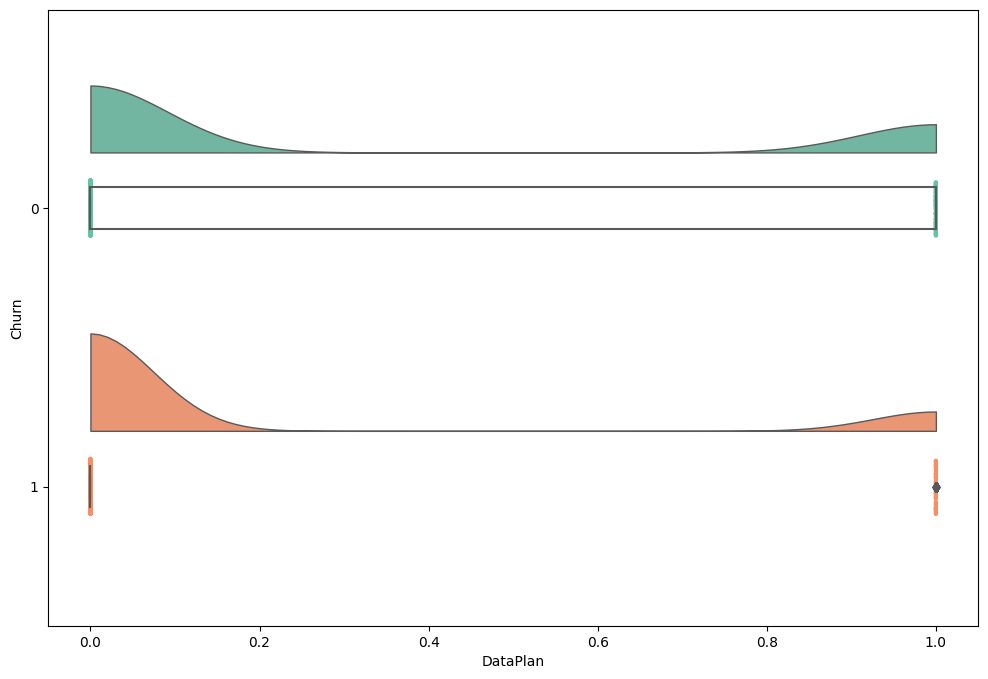

In [89]:
plt.figure(figsize = (12,8))
ptitprince.RainCloud(data = df4, x= 'Churn', y= 'DataPlan', orient='h');

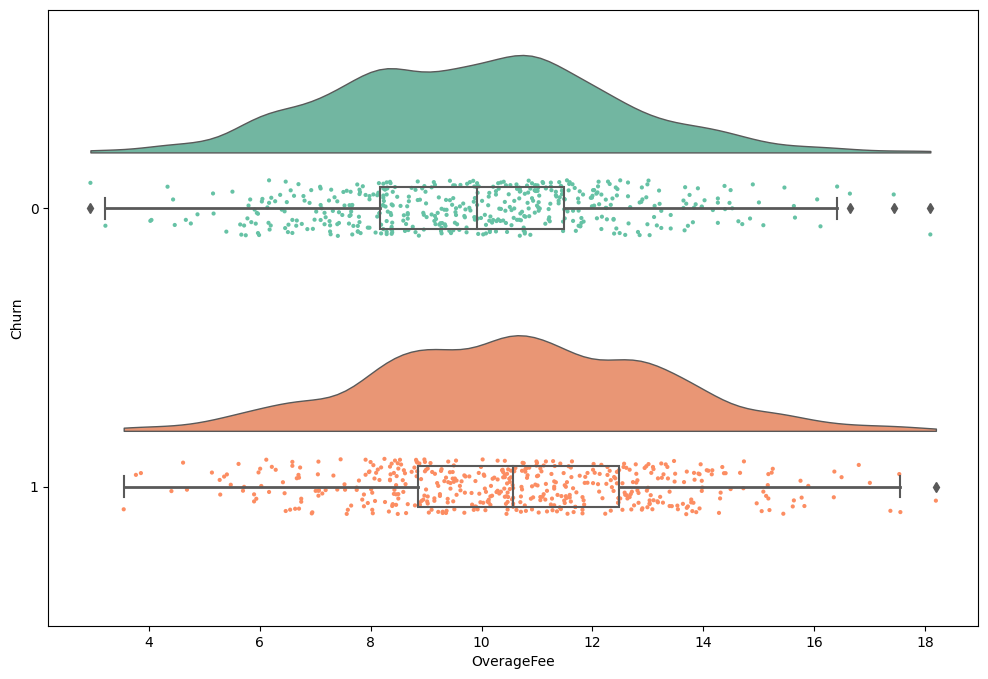

In [90]:
plt.figure(figsize = (12,8))
ptitprince.RainCloud(data = df4, x= 'Churn', y= 'OverageFee', orient='h');

In [91]:
df4.columns

Index(['Churn', 'AccountWeeks', 'ContractRenewal', 'DataPlan', 'DataUsage',
       'CustServCalls', 'DayMins', 'DayCalls', 'MonthlyCharge', 'OverageFee',
       'RoamMins'],
      dtype='object')

In [92]:
X = df4.drop('Churn', axis =1)
y = df4['Churn']

In [93]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

## Feature Scaling

In [94]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_train

array([[ 1.20700408,  0.44014422, -0.53266327, ...,  0.55816252,
         0.50499971, -1.49929511],
       [-0.52759411,  0.44014422, -0.53266327, ..., -0.19862364,
         0.02249308,  0.29350216],
       [ 1.38823075, -2.27198256, -0.53266327, ..., -0.66711032,
         0.04584018,  1.38324168],
       ...,
       [ 0.14553354,  0.44014422, -0.53266327, ..., -1.48395887,
        -2.75192007, -0.0931796 ],
       [-0.65704174,  0.44014422, -0.53266327, ...,  0.61822491,
        -0.70126687, -1.67505955],
       [-2.2621923 ,  0.44014422, -0.53266327, ..., -1.1836469 ,
        -1.11373222,  0.29350216]])

In [95]:
X_test = scaler.transform(X_test)
X_test

array([[-0.63115221,  0.44014422, -0.53266327, ...,  0.43803773,
         0.47776144,  0.32865505],
       [-1.64084369,  0.44014422, -0.53266327, ...,  0.37797534,
         1.08478591, -0.55016714],
       [ 1.51767838,  0.44014422,  1.87735866, ...,  0.3719691 ,
        -1.17599114,  0.4692666 ],
       ...,
       [-0.24280933,  0.44014422, -0.53266327, ..., -0.282711  ,
         0.65286465, -0.19863827],
       [ 2.06135841,  0.44014422, -0.53266327, ..., -1.00345972,
        -0.31993098, -0.58532003],
       [-0.86415794,  0.44014422, -0.53266327, ..., -0.88333494,
        -2.10598377, -1.21807201]])

## Machine Learning Model

### Decision Tree


Decision Tree model achieved an accuracy of 83%, with balanced performance in predicting both customer churn and retention, demonstrating good capability in distinguishing between the two classes.

In [96]:
param_grid = {
    'max_depth': [3, 4, 5, 6, None],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(DecisionTreeClassifier(random_state=0), param_grid, cv=5, scoring='f1')
grid_search.fit(X_train, y_train)
DS_best_model = grid_search.best_estimator_

print("Best parameters found:", grid_search.best_params_)


Best parameters found: {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 5}


              precision    recall  f1-score   support

           0       0.78      0.87      0.83       165
           1       0.84      0.74      0.79       154

    accuracy                           0.81       319
   macro avg       0.81      0.81      0.81       319
weighted avg       0.81      0.81      0.81       319



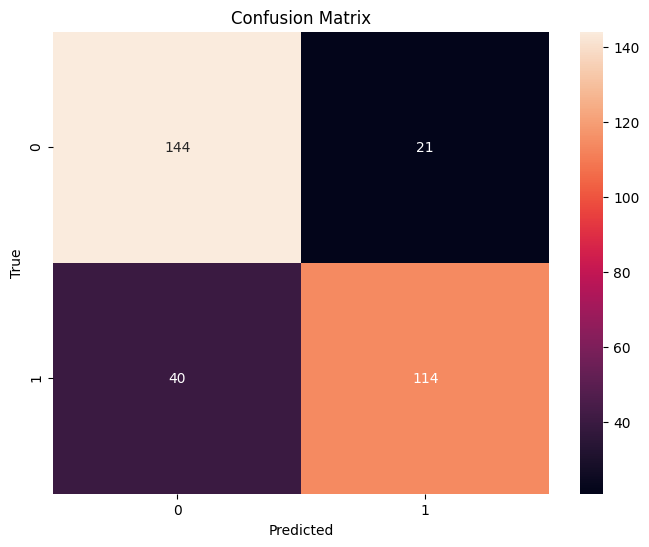

In [97]:
DS_best_model.fit(X_train, y_train)

pd = DS_best_model.predict(X_test)
print(classification_report(y_test, pd))
cm = confusion_matrix(y_test, pd)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

### Random Forest

The optimized Random Forest model achieved 87% accuracy with balanced performance in predicting customer churn, making it a reliable tool for actionable insights.

In [98]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

grid_search = GridSearchCV(RandomForestClassifier(random_state=0), param_grid, cv=5, scoring='f1')
grid_search.fit(X_train, y_train)

best_rf_model = grid_search.best_estimator_

print("Best parameters found:", grid_search.best_params_)


Best parameters found: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}


              precision    recall  f1-score   support

           0       0.83      0.90      0.86       165
           1       0.88      0.81      0.84       154

    accuracy                           0.85       319
   macro avg       0.86      0.85      0.85       319
weighted avg       0.85      0.85      0.85       319



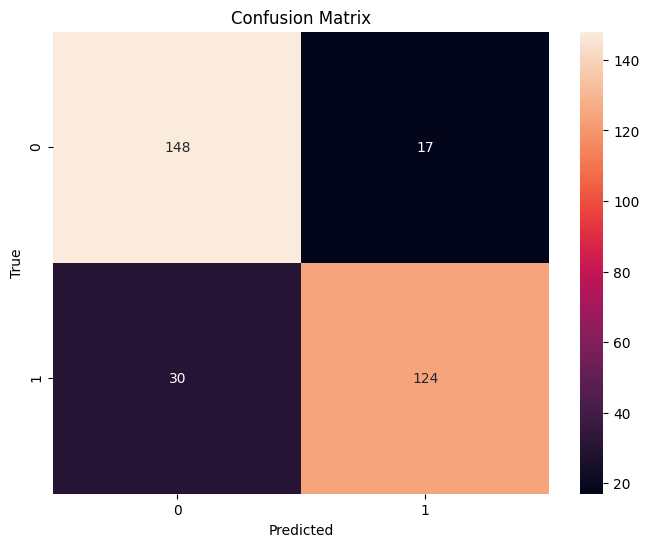

In [99]:
pr = best_rf_model.predict(X_test)
print(classification_report(y_test, pr))
cm = confusion_matrix(y_test, pr)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

### Gradient Boosting

In [100]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'subsample': [0.8, 1.0]
}

grid_search = GridSearchCV(GradientBoostingClassifier(random_state=0), param_grid, cv=5, scoring='f1')
grid_search.fit(X_train, y_train)

best_gb_model = grid_search.best_estimator_
print("Best parameters found:", grid_search.best_params_)

Best parameters found: {'learning_rate': 0.01, 'max_depth': 3, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 200, 'subsample': 1.0}


              precision    recall  f1-score   support

           0       0.81      0.88      0.85       165
           1       0.86      0.78      0.82       154

    accuracy                           0.83       319
   macro avg       0.84      0.83      0.83       319
weighted avg       0.84      0.83      0.83       319



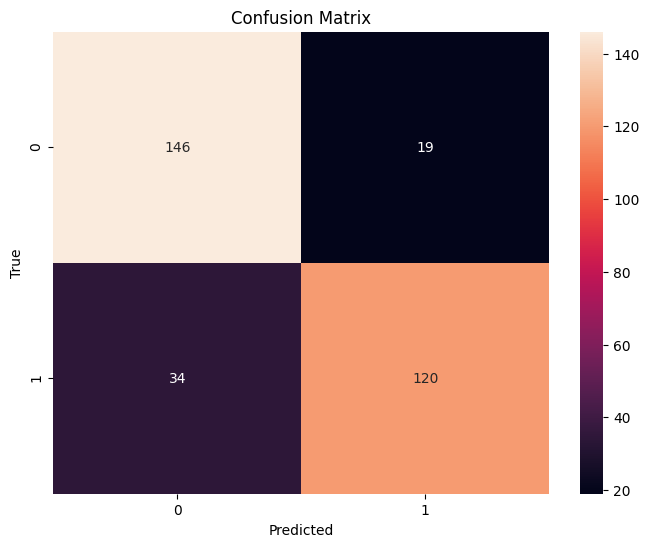

In [101]:
pg = best_gb_model.predict(X_test)
print(classification_report(y_test, pg))

cm = confusion_matrix(y_test, pg)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

### XGBoost

The XGBoost model optimized using GridSearchCV achieved an impressive accuracy of 87%, demonstrating high reliability in predicting customer churn with well-balanced precision and recall across both classes.

In [104]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'min_child_weight': [1, 3, 5],
    'gamma': [0, 0.1, 0.3],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=0)
grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, cv=5, scoring='f1')
grid_search.fit(X_train, y_train)

best_xgb_model = grid_search.best_estimator_
print("Best parameters found:", grid_search.best_params_)


Best parameters found: {'colsample_bytree': 1.0, 'gamma': 0, 'learning_rate': 0.1, 'max_depth': 3, 'min_child_weight': 5, 'n_estimators': 50, 'subsample': 1.0}


              precision    recall  f1-score   support

           0       0.83      0.88      0.86       165
           1       0.87      0.81      0.84       154

    accuracy                           0.85       319
   macro avg       0.85      0.85      0.85       319
weighted avg       0.85      0.85      0.85       319



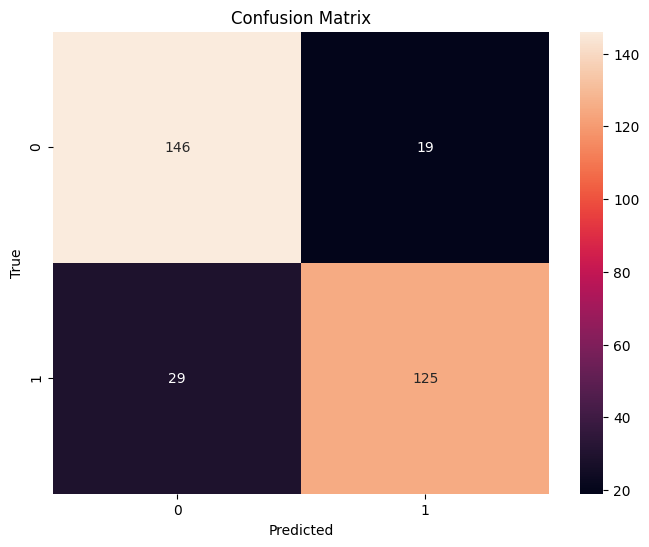

In [105]:
xg = best_xgb_model.predict(X_test)
print(classification_report(y_test, xg))

cm = confusion_matrix(y_test, xg)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

The XGBoost model tuned with RandomizedSearchCV reached an accuracy of 82%, providing a faster yet effective solution for predicting customer churn with balanced performance between precision and recall.

In [106]:
param_dist = {
    'n_estimators': [50, 100, 200, 300, 400],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 5, 7, 9, 12],
    'min_child_weight': [1, 3, 5, 7],
    'gamma': [0, 0.1, 0.2, 0.3, 0.4],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=0)
random_search = RandomizedSearchCV(estimator=xgb, param_distributions=param_dist, n_iter=50, cv=5, scoring='f1', random_state=0)
random_search.fit(X_train, y_train)

best_xgb_model = random_search.best_estimator_
print("Best parameters found:", random_search.best_params_)


Best parameters found: {'subsample': 1.0, 'n_estimators': 50, 'min_child_weight': 5, 'max_depth': 3, 'learning_rate': 0.05, 'gamma': 0.2, 'colsample_bytree': 0.6}


              precision    recall  f1-score   support

           0       0.82      0.88      0.85       165
           1       0.87      0.80      0.83       154

    accuracy                           0.84       319
   macro avg       0.85      0.84      0.84       319
weighted avg       0.84      0.84      0.84       319



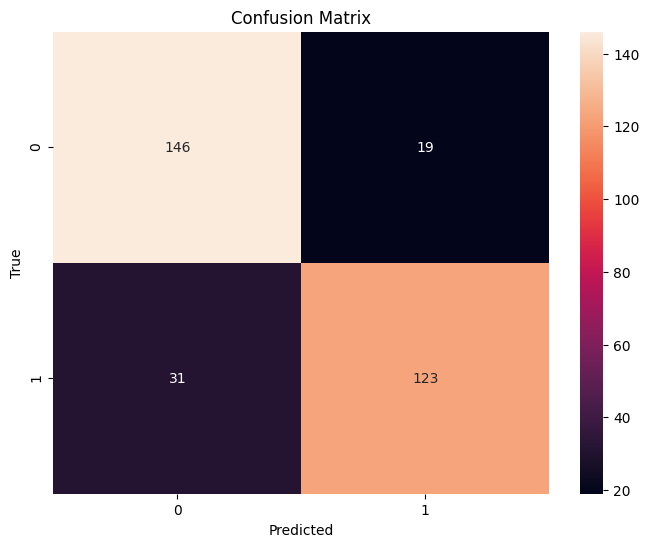

In [107]:
xg = best_xgb_model.predict(X_test)
print(classification_report(y_test, xg))

cm = confusion_matrix(y_test, xg)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

### KNN

Using **K-Nearest Neighbors (KNN)**, we analyzed model performance with three key visualizations:

1. **Learning Curves** showed potential overfitting on training data.
2. **Score vs. K Neighbors** plot helped us identify the optimal number of neighbors that balances model accuracy and generalization.
3. **Confusion Matrix** confirmed an accuracy of **83%**, with balanced precision and recall.

**Final Outcome:**
By selecting an optimal number of neighbors and using distance-based weighting, the KNN model achieved a strong balance between accuracy and generalization, making it effective for prediction in this case.

In [108]:
# Instanciate the model
knn_model = KNeighborsRegressor()

# Train the model on the scaled Training data
cv_results = cross_validate(knn_model, X,y)

base_knn_score = cv_results['test_score'].mean()

base_knn_score

0.007097867413521008

In [109]:

# knn_scaler = MinMaxScaler()

X_rescaled = scaler.fit_transform(X)

cv_results = cross_validate(knn_model, X_rescaled,y)

rescaled_score = cv_results['test_score'].mean()

rescaled_score

0.4229153583247379

In [110]:
score = []
neighbours = []

for k in range(1,25):

    # Instanciate the model
    knn_model = KNeighborsRegressor(n_neighbors = k)

    # Train the model on the scaled Training data
    cv_results = cross_validate(knn_model, X_rescaled,y)

    # Append the score and k
    score.append(cv_results['test_score'].mean())
    neighbours.append(k)

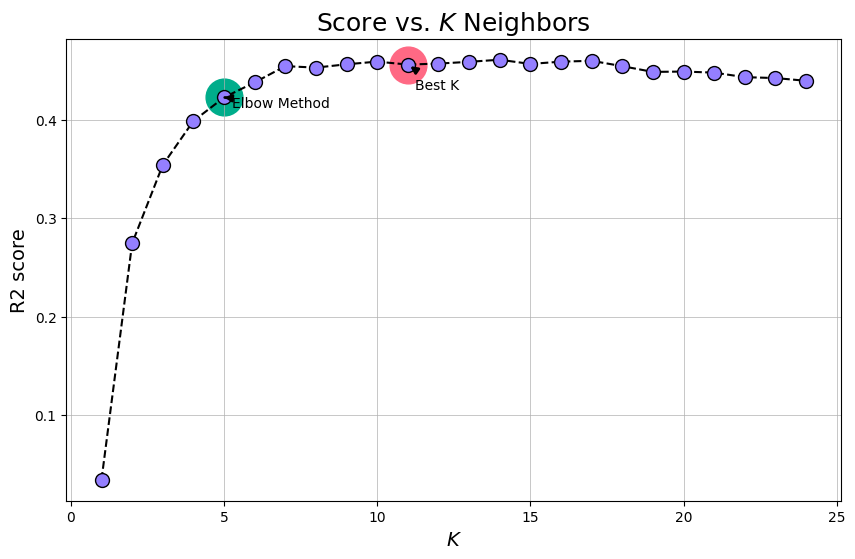

In [111]:
# Plot the evolution of the score below

with plt.style.context('seaborn-deep'):
    # figsize
    plt.figure(figsize=(10,6))
    # getting axes
    ax = plt.gca()
    # plotting
    ax.plot(range(1,25),score,color='black', linestyle='dashed', marker='o',markerfacecolor='#947FFF', markersize=10)
    # more
    ax.set_title('Score vs. $K$ Neighbors', fontsize = 18)
    ax.set_xlabel('$K$', fontsize = 14)
    ax.set_ylabel('R2 score', fontsize = 14)
    ax.grid(axis="x",linewidth=0.5)
    ax.grid(axis="y",linewidth=0.5)
    # best K
    # focusing
    ax.scatter(5,score[5-1],c='#00ad8b',s=700)
    ax.scatter(11,score[11-1],c='#ff6984',s=700)

    # annotate
    ax.annotate("Elbow Method",
                xy=(5,score[5-1]),
                xytext=(5+0.25,score[6-1]-0.025),
                arrowprops=dict(arrowstyle='-|>',
                                fc="k",
                                ec="k",
                                lw=2),
                bbox=dict(pad=5, facecolor="none", edgecolor="none")
               )

    ax.annotate("Best K",
            xy=(11,score[11-1]),
            xytext=(11+0.25,score[11-1]-0.025),
            arrowprops=dict(arrowstyle='-|>',
                            fc="k",
                            ec="k",
                            lw=2),
            bbox=dict(pad=5, facecolor="none", edgecolor="none")
           )


    plt.show()

In [112]:
best_k=11

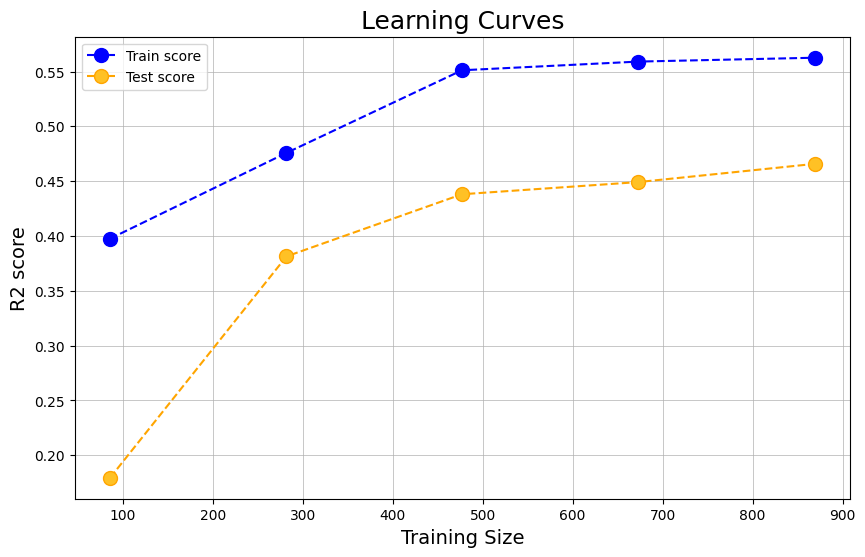

In [113]:

# Get train scores, train sizes, and validation scores using `learning_curve`, r2 score
train_sizes, train_scores, test_scores = learning_curve(estimator = KNeighborsRegressor(n_neighbors=best_k),
                                                              X = X_rescaled,
                                                              y = y,
                                                              train_sizes =  np.linspace(0.1, 1.0, 5),
                                                              cv = 10,
                                                              scoring = 'r2')

# Take the mean of cross-validated train scores and validation scores
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

# Plot the learning curves
with plt.style.context('seaborn-deep'):
    # figsize
    plt.figure(figsize=(10,6))
    # getting axes
    ax = plt.gca()
    # plotting
    ax.plot(train_sizes, train_scores_mean, label = 'Train score',color='blue', linestyle='dashed', marker='o',markerfacecolor='blue', markersize=10)
    ax.plot(train_sizes, test_scores_mean, label = 'Test score',color='orange', linestyle='dashed', marker='o',markerfacecolor='#ffc125', markersize=10)
    # more
    ax.set_title('Learning Curves', fontsize = 18)
    ax.set_xlabel('Training Size', fontsize = 14)
    ax.set_ylabel('R2 score', fontsize = 14)
    ax.grid(axis="x",linewidth=0.5)
    ax.grid(axis="y",linewidth=0.5)
    ax.legend(loc="best")

    plt.show()


In [114]:

# Get train scores, train sizes, and validation scores using `learning_curve`, r2 score
train_sizes, train_scores, test_scores = learning_curve(estimator = KNeighborsRegressor(n_neighbors=best_k),
                                                              X = X_rescaled,
                                                              y = y,
                                                              train_sizes =  np.linspace(0.1, 1.0, 5),
                                                              cv = 10,
                                                              scoring = 'r2')

# Take the mean of cross-validated train scores and validation scores
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

In [116]:
cv_results = cross_validate(KNeighborsRegressor(n_neighbors=best_k), X_rescaled,y, scoring = 'neg_mean_absolute_error')

price_error = cv_results['test_score'].mean()

price_error

-0.2775269386347854

              precision    recall  f1-score   support

           0       0.79      0.83      0.81       165
           1       0.81      0.77      0.79       154

    accuracy                           0.80       319
   macro avg       0.80      0.80      0.80       319
weighted avg       0.80      0.80      0.80       319



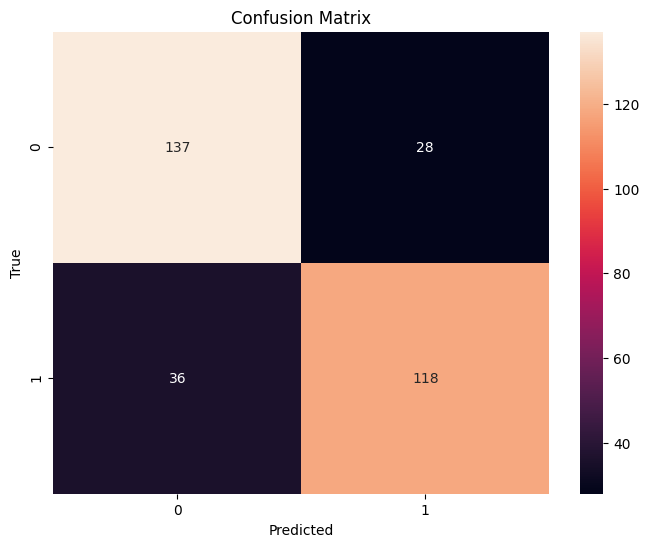

In [117]:
clfk = KNeighborsClassifier(n_neighbors=5, weights='distance')
clfk.fit(X_train, y_train)

pk = clfk.predict(X_test)
print(classification_report(y_test, pk))

cm = confusion_matrix(y_test, pk)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

### AUC ROC

**AUC ROC** measures a model's ability to classify correctly. Higher AUC values indicate better performance, with 1.0 being perfect and 0.5 meaning random guessing.

In [118]:
p1 = DS_best_model.predict_proba(X_test)[:, 1]
p2 = best_rf_model.predict_proba(X_test)[:, 1]
p3 = best_gb_model.predict_proba(X_test)[:, 1]
p4 = best_xgb_model.predict_proba(X_test)[:, 1]
p5 = clfk.predict_proba(X_test)[:, 1]

In [119]:
# auc scores
auc_score1 = roc_auc_score(y_test, p1)
auc_score2 = roc_auc_score(y_test, p2)
auc_score3 = roc_auc_score(y_test, p3)
auc_score4 = roc_auc_score(y_test, p4)
auc_score5 = roc_auc_score(y_test, p5)

print("AUC Score for Decision Tree model (DS_best_model):", auc_score1)
print("AUC Score for Random Forest model (best_rf_model):", auc_score2)
print("AUC Score for Gradient Boosting model (best_gb_model):", auc_score3)
print("AUC Score for XGBoost model (best_xgb_model):", auc_score4)
print("AUC Score for KNN model (clfk):", auc_score5)


AUC Score for Decision Tree model (DS_best_model): 0.8589925226288864
AUC Score for Random Forest model (best_rf_model): 0.8817788272333728
AUC Score for Gradient Boosting model (best_gb_model): 0.8713695395513579
AUC Score for XGBoost model (best_xgb_model): 0.8798110979929162
AUC Score for KNN model (clfk): 0.8598976780794962


In [120]:
# ROC curve for each model
fpr1, tpr1, thresh1 = roc_curve(y_test, p1, pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(y_test, p2, pos_label=1)
fpr3, tpr3, thresh3 = roc_curve(y_test, p3, pos_label=1)
fpr4, tpr4, thresh4 = roc_curve(y_test, p4, pos_label=1)
fpr5, tpr5, thresh5 = roc_curve(y_test, p5, pos_label=1)

# ROC curve for tpr = fpr (random guessing line)
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)


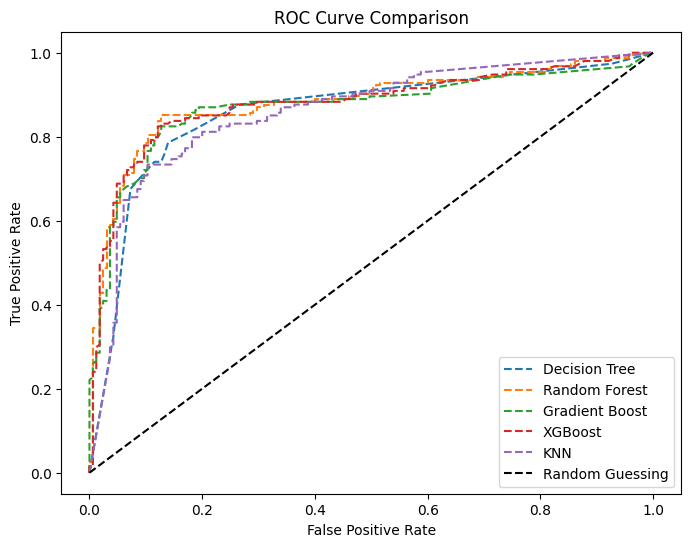

In [121]:
# Plotting ROC Curves for each model
plt.figure(figsize=(8, 6))
plt.plot(fpr1, tpr1, linestyle='--', label='Decision Tree')
plt.plot(fpr2, tpr2, linestyle='--', label='Random Forest')
plt.plot(fpr3, tpr3, linestyle='--', label='Gradient Boost')
plt.plot(fpr4, tpr4, linestyle='--', label='XGBoost')
plt.plot(fpr5, tpr5, linestyle='--', label='KNN')
plt.plot(p_fpr, p_tpr, linestyle='--', color='black', label='Random Guessing')

plt.title('ROC Curve Comparison')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='best')
plt.show()
